<a href="https://colab.research.google.com/github/tusker4/Sesac_Saltlux_Team5/blob/main/ConcreteStrength_ver4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Data Loading

In [ ]:
# permmision warning 방지
!mkdir -p ~/.kaggle
!cp '/content/drive/MyDrive/kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/'kaggle.json'

# download
!kaggle competitions download -c playground-series-s3e9
# unzip(압축풀기)
!unzip -q /content/playground-series-s3e9.zip

  0% 0.00/108k [00:00<?, ?B/s]
100% 108k/108k [00:00<00:00, 61.8MB/s]


In [ ]:
df = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sample_submission.csv')

In [ ]:
# Train data
df.head(3)

id  CementComponent  BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
0   0            525.0               0.0              0.0           186.0   
1   1            143.0             169.0            143.0           191.0   
2   2            289.0             134.7              0.0           185.7   

   SuperplasticizerComponent  CoarseAggregateComponent  \
0                        0.0                    1125.0   
1                        8.0                     967.0   
2                        0.0                    1075.0   

   FineAggregateComponent  AgeInDays  Strength  
0                   613.0          3     10.38  
1                   643.0         28     23.52  
2                   795.3         28     36.96

In [ ]:
# Train data
print(df.shape,"\n") # X in R^8 (id colum is just index), y in R^1, # of data : 5407
print(df.info(),"\n") # age in days : int64, others: float64
print(df.isnull().sum(),"\n") # no nulls :-)
#df.describe()

(5407, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5407 non-null   int64  
 1   CementComponent            5407 non-null   float64
 2   BlastFurnaceSlag           5407 non-null   float64
 3   FlyAshComponent            5407 non-null   float64
 4   WaterComponent             5407 non-null   float64
 5   SuperplasticizerComponent  5407 non-null   float64
 6   CoarseAggregateComponent   5407 non-null   float64
 7   FineAggregateComponent     5407 non-null   float64
 8   AgeInDays                  5407 non-null   int64  
 9   Strength                   5407 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 422.5 KB
None 

id                           0
CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent           

In [ ]:
# Test data
print(df_test.shape,"\n") # X in R^8 (id colum is just index), y none, # of data : 3605
print(df_test.info(),"\n") # age in days : int64, others: float64
print(df_test.isnull().sum(),"\n") # no nulls :-)
#df_test.describe()

(3605, 8) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3605 entries, 5407 to 9011
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            3605 non-null   float64
 1   BlastFurnaceSlag           3605 non-null   bool   
 2   FlyAshComponent            3605 non-null   bool   
 3   WaterComponent             3605 non-null   float64
 4   SuperplasticizerComponent  3605 non-null   bool   
 5   CoarseAggregateComponent   3605 non-null   float64
 6   FineAggregateComponent     3605 non-null   float64
 7   AgeInDays                  3605 non-null   int64  
dtypes: bool(3), float64(4), int64(1)
memory usage: 308.6 KB
None 

CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
dty

In [ ]:
# ID to index

def DataPreprocessing(X):
    # id to column
    X = X.set_index('id', inplace=True)
    return X

# Applying data preprocessing
DataPreprocessing(df)
DataPreprocessing(df_test)

df.head(3)

CementComponent  BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
id                                                                       
0             525.0               0.0              0.0           186.0   
1             143.0             169.0            143.0           191.0   
2             289.0             134.7              0.0           185.7   

    SuperplasticizerComponent  CoarseAggregateComponent  \
id                                                        
0                         0.0                    1125.0   
1                         8.0                     967.0   
2                         0.0                    1075.0   

    FineAggregateComponent  AgeInDays  Strength  
id                                               
0                    613.0          3     10.38  
1                    643.0         28     23.52  
2                    795.3         28     36.96

# Data Explore

## Overview of the Entire Dataset

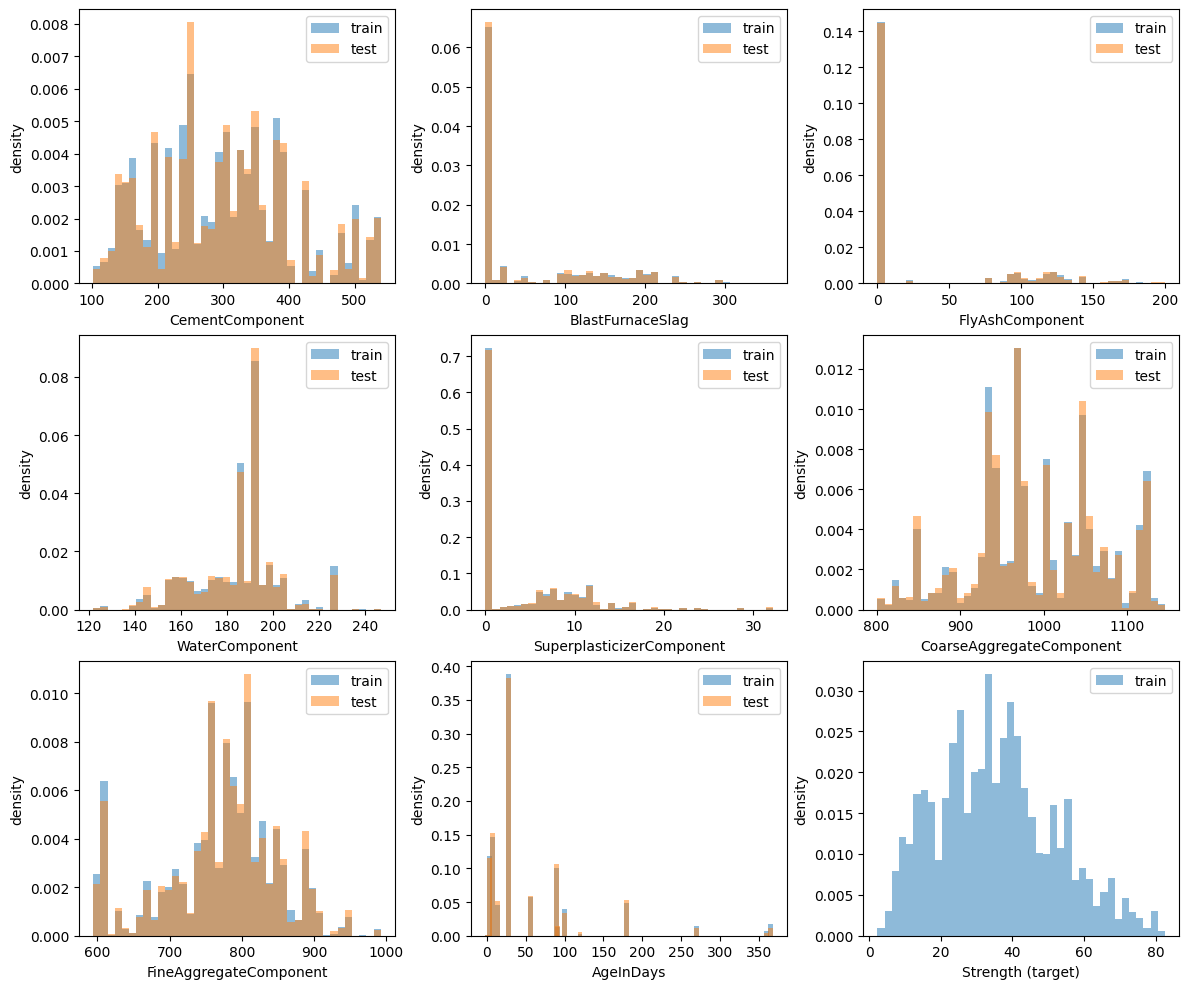

In [ ]:
# Visualization

target = 'Strength'
def analyze(train, test, col, ax):
    bins = 40
    column = train[col]
    if col in test.columns:
        both = np.hstack([column.values, test[col].values])
    else:
        both = column
    uni = np.unique(column)
    unival = len(uni)
    if unival < bins:
        vc_tr = column.value_counts().sort_index() / len(train)
        if col in test.columns:
            vc_te = test[col].value_counts().sort_index() / len(test)
            ax.bar(vc_tr.index, vc_tr, width=6, label='train', alpha=0.5)
            ax.bar(vc_te.index, vc_te, width=6, label='test', alpha=0.5)
        else:
            ax.bar(vc_tr.index, vc_tr, label='train', alpha=0.5)
        if unival <= 12:
            ax.set_xticks(vc_tr.index)
        else:
            ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # only integer labels
        ax.set_xlabel(col + (' (target)' if col == target else ''))
        ax.set_ylabel('density')
        ax.legend()
    else:
        hist_bins = np.linspace(both.min(), both.max(), bins+1)
        ax.hist(column, bins=hist_bins, density=True, label='train', alpha=0.5)
        if col in test.columns:
            ax.hist(test[col], bins=hist_bins, density=True, label='test', alpha=0.5)
        ax.set_xlabel(col + (' (target)' if col == target else ''))
        ax.set_ylabel('density')
        ax.legend()


_, axs = plt.subplots(3, 3, figsize=(12, 10))
axs = axs.ravel()
for col, ax in zip(df.columns, axs):
    analyze(df, df_test, col, ax)
plt.tight_layout(h_pad=0.5, w_pad=0.5)
plt.show()

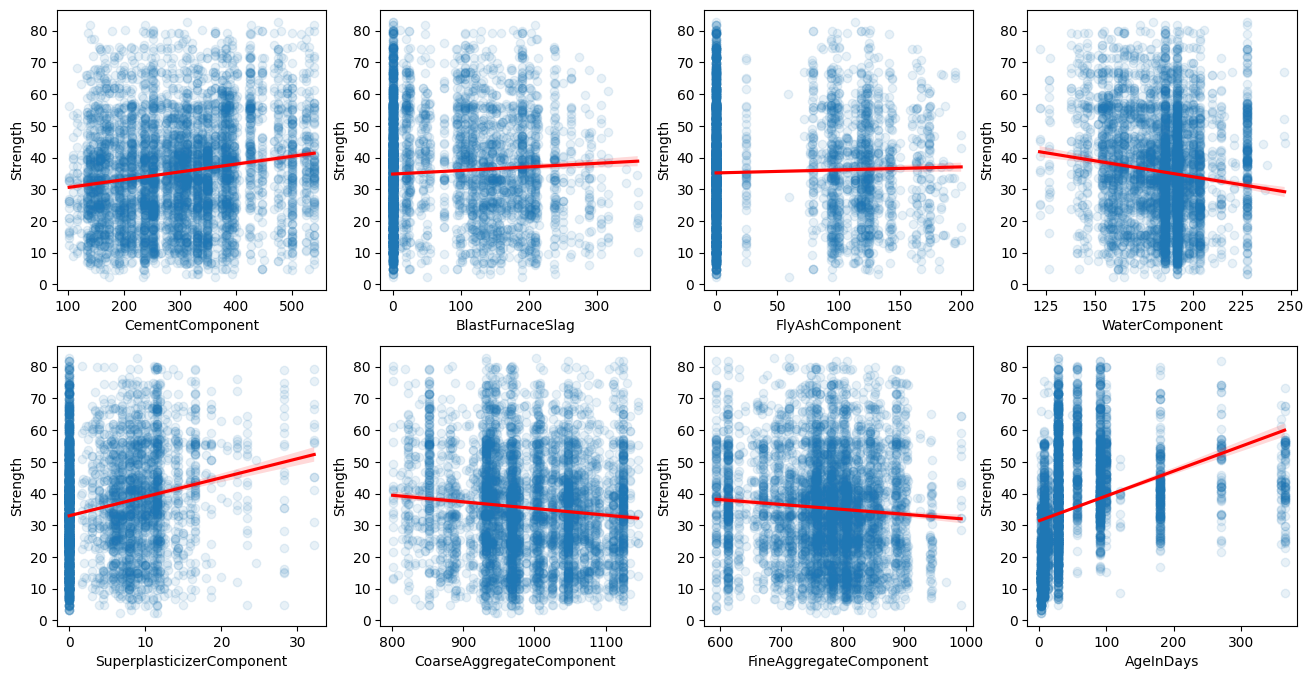

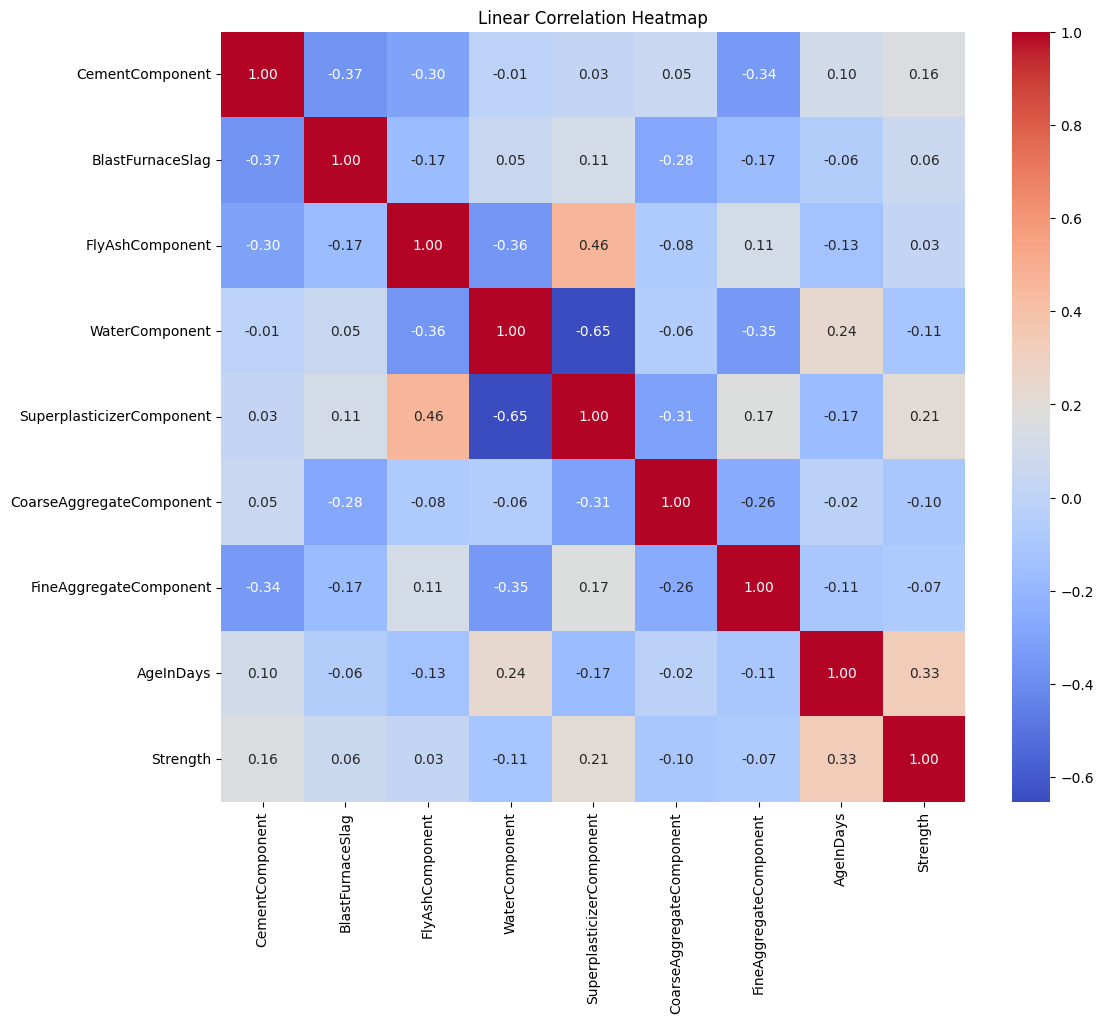

In [ ]:
# Correlation
fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
feats = ['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays']

for idx, feat in enumerate(feats):
  # 회귀선 + 데이터포인트
    sns.regplot(x = feat, y = df.Strength, data = df,
              ax = axs[int(idx/4)][ idx % 4  ], line_kws={'color':'red'},
             scatter_kws={'alpha': 0.1})

plt.show()


# Correlation: Heat map
correlation_matrix = df.corr()
#print(correlation_matrix['Strength'].sort_values(ascending = False))

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Linear Correlation Heatmap')
plt.show()

## Exploring the Graph Based on Intervals in the Dataset

### The Entire Dataset

In [ ]:
def my_correlation(dataframe, x_column):
    df = dataframe
    x_column = x_column
    print('x_column:', x_column)

    max_value = df[x_column].max()
    min_value = df[x_column].min()
    print('max, min:', max_value, min_value)

    step_size = (max_value - min_value) / 10
    x_ticks = np.arange(min_value, max_value + step_size, step_size)

    if len(x_ticks) > 11:
        x_ticks = x_ticks[:11]
    x_ticks = np.insert(x_ticks, 0, 0)
    print('x_ticks',x_ticks)

    midpoints = [(x_ticks[i] + x_ticks[i + 1]) / 2 for i in range(1, len(x_ticks) - 1)] # 평균은 x_ticks[1] 부터
    midpoints = np.insert(midpoints, 0, 0).tolist()

    _0 = df[(df[x_column] == x_ticks[0])]
    _1 = df[(df[x_column] >= x_ticks[0]) & (df[x_column] < x_ticks[1])] # 부등호 주의
    _2 = df[(df[x_column] >= x_ticks[1]) & (df[x_column] < x_ticks[2])]
    _3 = df[(df[x_column] >= x_ticks[2]) & (df[x_column] < x_ticks[3])]
    _4 = df[(df[x_column] >= x_ticks[3]) & (df[x_column] < x_ticks[4])]
    _5 = df[(df[x_column] >= x_ticks[4]) & (df[x_column] < x_ticks[5])]
    _6 = df[(df[x_column] >= x_ticks[5]) & (df[x_column] < x_ticks[6])]
    _7 = df[(df[x_column] >= x_ticks[6]) & (df[x_column] < x_ticks[7])]
    _8 = df[(df[x_column] >= x_ticks[7]) & (df[x_column] < x_ticks[8])]
    _9 = df[(df[x_column] >= x_ticks[8]) & (df[x_column] < x_ticks[9])]
    _10 = df[(df[x_column] >= x_ticks[9]) & (df[x_column] < x_ticks[10])]

    avg_list = [_0['Strength'].mean(), _1['Strength'].mean(),_2['Strength'].mean(),_3['Strength'].mean(),_4['Strength'].mean(),_5['Strength'].mean()
                ,_6['Strength'].mean(),_7['Strength'].mean(),_8['Strength'].mean(),_9['Strength'].mean(),_10['Strength'].mean()]
    print('avg_list:', avg_list)

    mean_strength_dict = {midpoints[i]: avg_list[i] for i in range(len(midpoints))}
    print('mean_strength_dict:', mean_strength_dict)


    subsets = [_0, _1, _2, _3, _4, _5, _6, _7, _8, _9, _10]
    subset_labels = ['_0', '_1', '_2', '_3', '_4', '_5', '_6', '_7', '_8', '_9', '_10']


    # box_plot
    fig, axes = plt.subplots(2, 6, figsize=(12, 6))
    axes = axes.flatten()

    for i, (subset, label) in enumerate(zip(subsets, subset_labels)):
        axes[i].boxplot(subset['Strength'])
        axes[i].set_xlabel(label)
        axes[i].set_ylabel('Strength')

    for j in range(len(subsets), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()

    plt.show()


    # scatter plot
    x = list(map(int, mean_strength_dict.keys()))  # Convert keys to integers for plotting
    y = list(mean_strength_dict.values())

    variances = [_0['Strength'].std(),_1['Strength'].std(), _2['Strength'].std(), _3['Strength'].std(), _4['Strength'].std(), _5['Strength'].std()
                 , _6['Strength'].std(), _7['Strength'].std(), _8['Strength'].std(), _9['Strength'].std(), _10['Strength'].std()]

    plt.errorbar(x, y, yerr=variances, color='blue', marker='o', linestyle='None', capsize=5)
    plt.scatter(x, y, color='blue', marker='o')

    plt.ylim(0, 60)

    plt.title('Scatter Plot of mean_strength_dict')
    plt.xlabel(x_column)
    plt.ylabel('Strength')

    plt.show()

    return mean_strength_dict

x_column: CementComponent
max, min: 540.0 102.0
x_ticks [  0.  102.  145.8 189.6 233.4 277.2 321.  364.8 408.6 452.4 496.2 540. ]
avg_list: [nan, nan, 31.54996825396826, 33.95964346349745, 33.727938808373594, 33.6466401816118, 34.59309973045822, 33.609789964994164, 38.59743471582181, 45.78270588235294, 44.456875]
mean_strength_dict: {0.0: nan, 123.9: nan, 167.70000000000002: 31.54996825396826, 211.50000000000003: 33.95964346349745, 255.30000000000004: 33.727938808373594, 299.1: 33.6466401816118, 342.9000000000001: 34.59309973045822, 386.70000000000005: 33.609789964994164, 430.5000000000001: 38.59743471582181, 474.30000000000007: 45.78270588235294, 518.1000000000001: 44.456875}


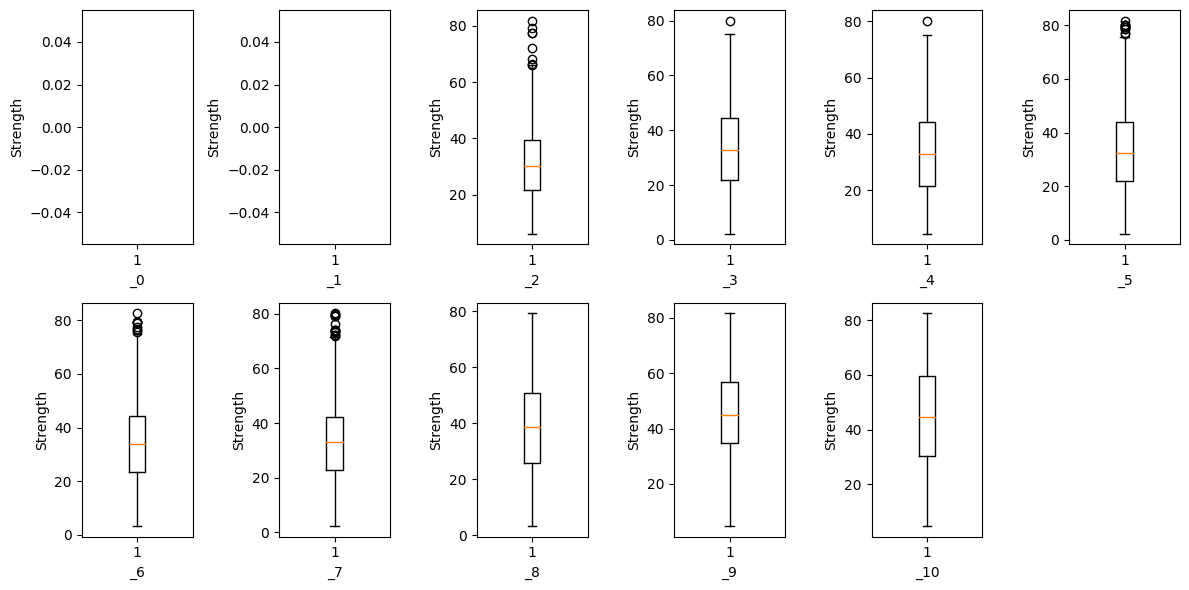

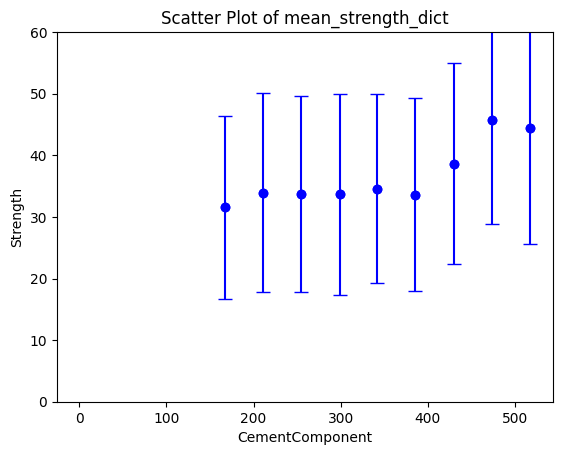

x_column: BlastFurnaceSlag
max, min: 359.4 0.0
x_ticks [  0.     0.    35.94  71.88 107.82 143.76 179.7  215.64 251.58 287.52
 323.46 359.4 ]
avg_list: [33.73419772583702, nan, 34.30785254534816, 40.53386206896552, 42.86315254237289, 36.39944572748268, 34.3927012987013, 37.65172413793104, 36.31873949579832, 39.95883720930233, 31.094848484848487]
mean_strength_dict: {0.0: 33.73419772583702, 17.97: nan, 53.91: 34.30785254534816, 89.85: 40.53386206896552, 125.78999999999999: 42.86315254237289, 161.73: 36.39944572748268, 197.67: 34.3927012987013, 233.60999999999999: 37.65172413793104, 269.54999999999995: 36.31873949579832, 305.49: 39.95883720930233, 341.42999999999995: 31.094848484848487}


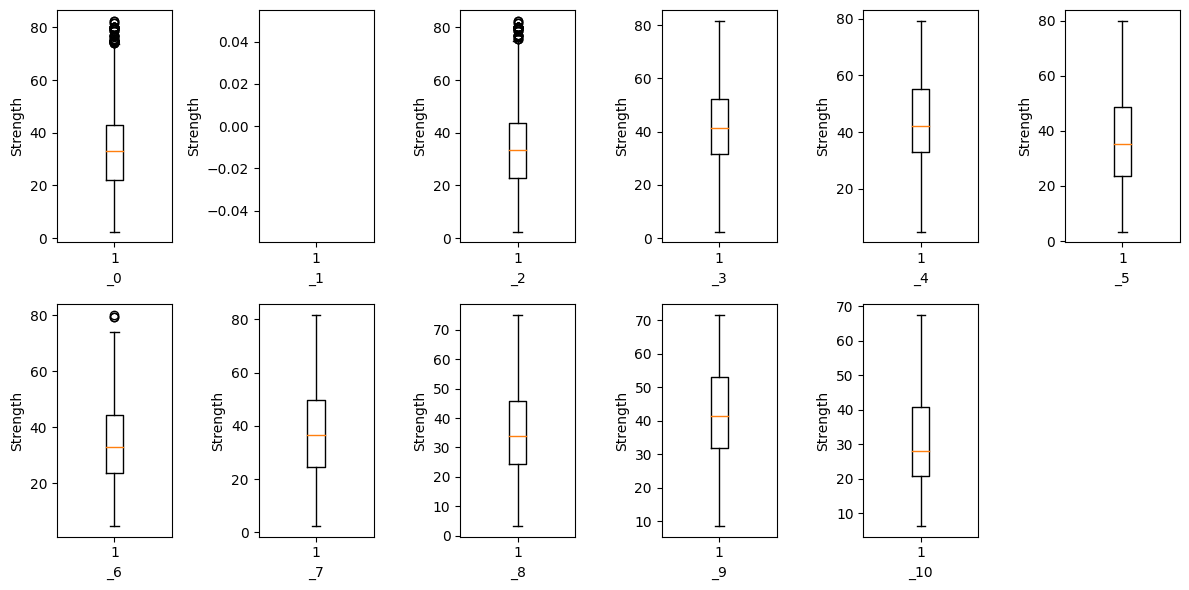

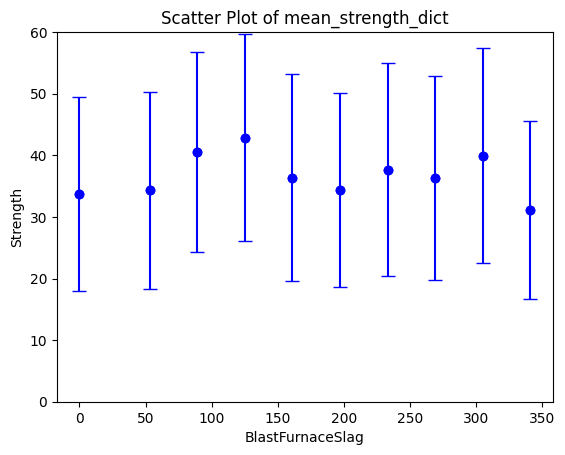

x_column: FlyAshComponent
max, min: 200.1 0.0
x_ticks [  0.     0.    20.01  40.02  60.03  80.04 100.05 120.06 140.07 160.08
 180.09 200.1 ]
avg_list: [35.04535523300229, nan, 35.04535523300229, 36.35339285714286, 29.916666666666668, 42.722235294117645, 37.317841945288755, 34.77623145400594, 36.61626702997275, 36.20521008403362, 36.30087837837838]
mean_strength_dict: {0.0: 35.04535523300229, 10.004999999999999: nan, 30.014999999999997: 35.04535523300229, 50.02499999999999: 36.35339285714286, 70.035: 29.916666666666668, 90.04499999999999: 42.722235294117645, 110.05499999999998: 37.317841945288755, 130.065: 34.77623145400594, 150.075: 36.61626702997275, 170.08499999999998: 36.20521008403362, 190.09499999999997: 36.30087837837838}


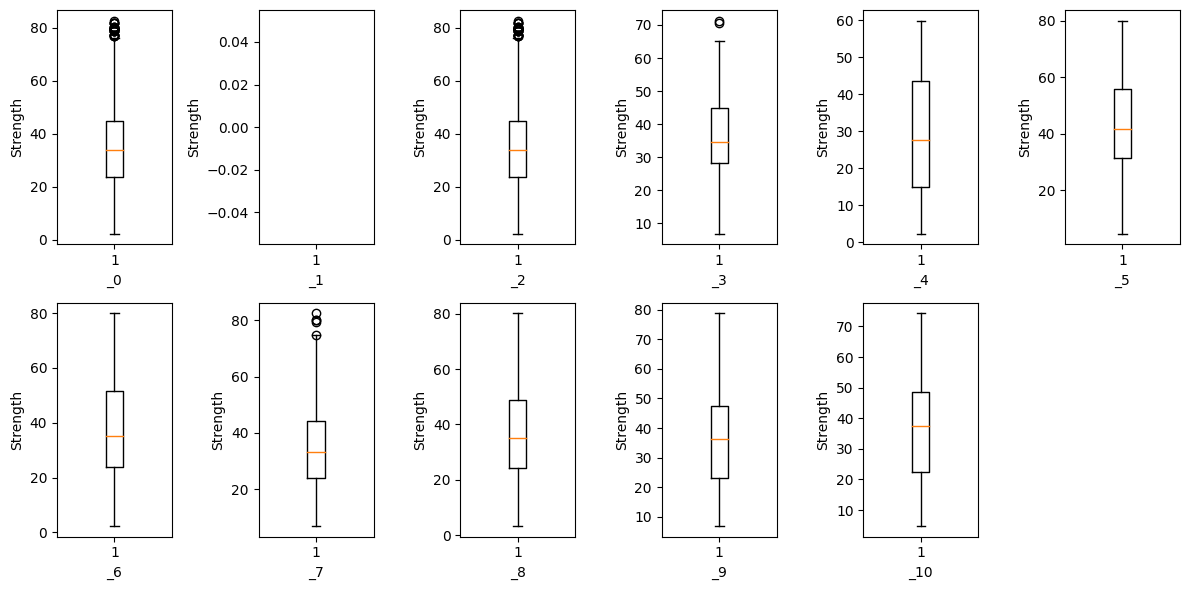

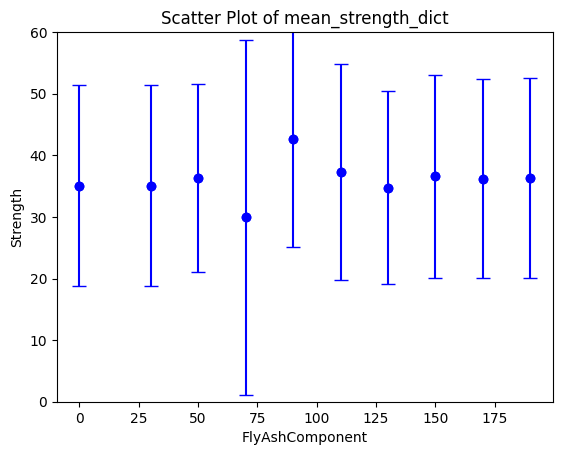

x_column: WaterComponent
max, min: 247.0 121.8
x_ticks [  0.   121.8  134.32 146.84 159.36 171.88 184.4  196.92 209.44 221.96
 234.48 247.  ]
avg_list: [nan, nan, 41.93333333333333, 44.36049689440994, 41.973828715365244, 38.48112262521589, 36.44393538913363, 32.60902382782475, 33.958361774744034, 36.620280373831775, 40.99279527559055]
mean_strength_dict: {0.0: nan, 128.06: nan, 140.57999999999998: 41.93333333333333, 153.09999999999997: 44.36049689440994, 165.62: 41.973828715365244, 178.14: 38.48112262521589, 190.65999999999997: 36.44393538913363, 203.17999999999995: 32.60902382782475, 215.7: 33.958361774744034, 228.21999999999997: 36.620280373831775, 240.73999999999995: 40.99279527559055}


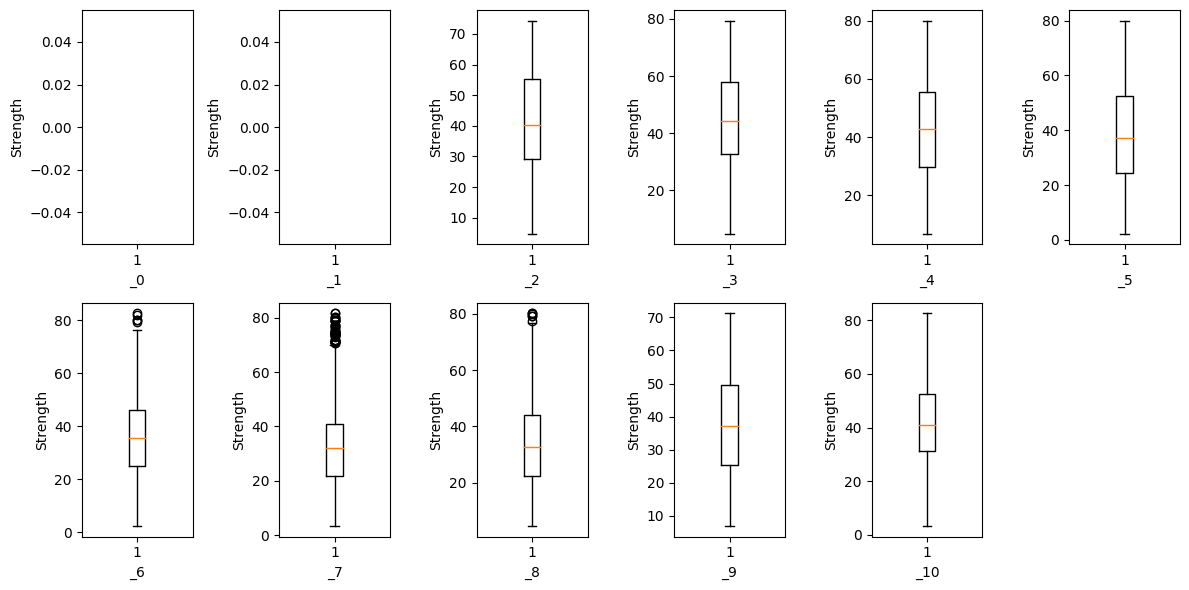

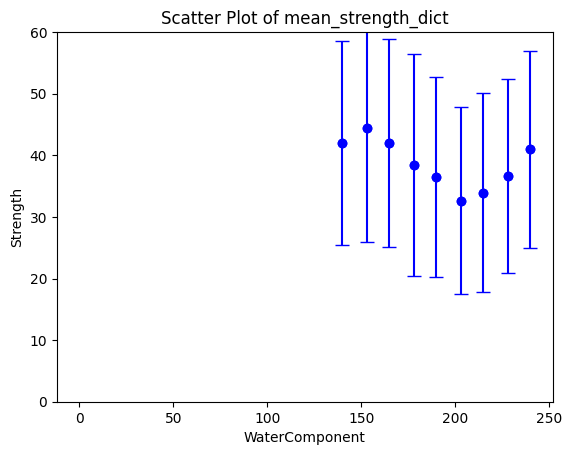

x_column: SuperplasticizerComponent
max, min: 32.2 0.0
x_ticks [ 0.    0.    3.22  6.44  9.66 12.88 16.1  19.32 22.54 25.76 28.98 32.2 ]
avg_list: [32.976589245943366, nan, 33.09151383276344, 36.541002444987775, 36.972345191040844, 39.97091042584435, 39.323040540540546, 47.7016814159292, 48.477391304347826, 41.7805, 46.85913043478261]
mean_strength_dict: {0.0: 32.976589245943366, 1.61: nan, 4.83: 33.09151383276344, 8.05: 36.541002444987775, 11.27: 36.972345191040844, 14.490000000000002: 39.97091042584435, 17.71: 39.323040540540546, 20.93: 47.7016814159292, 24.150000000000002: 48.477391304347826, 27.37: 41.7805, 30.590000000000003: 46.85913043478261}


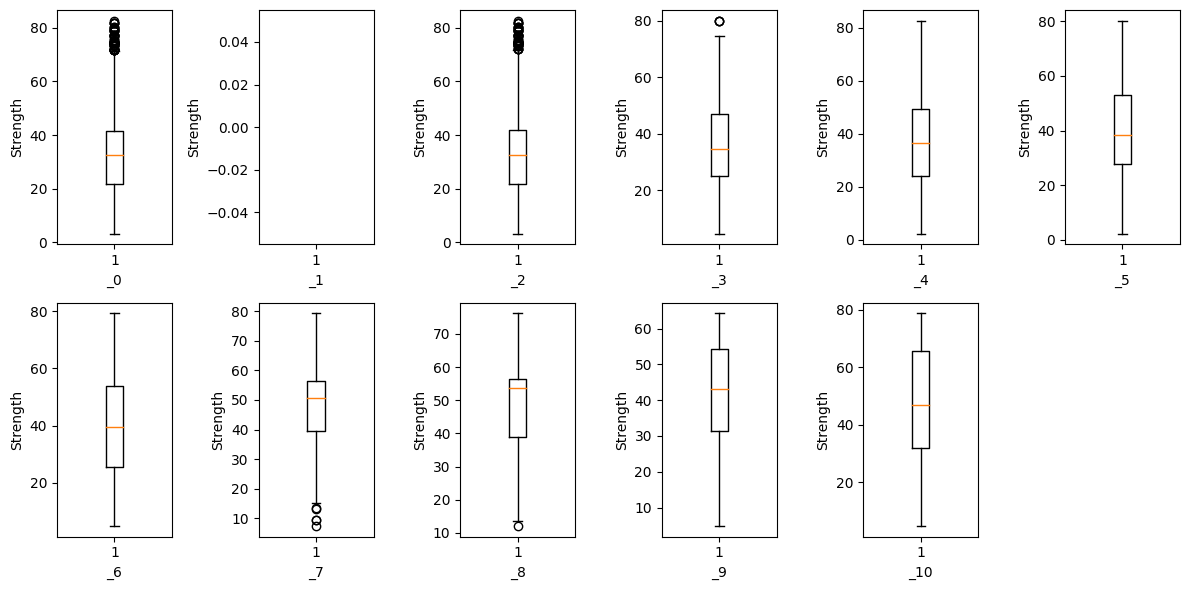

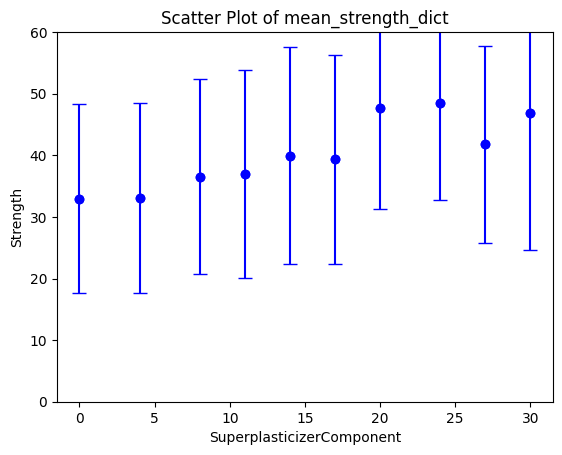

x_column: CoarseAggregateComponent
max, min: 1145.0 801.0
x_ticks [   0.   801.   835.4  869.8  904.2  938.6  973.  1007.4 1041.8 1076.2
 1110.6 1145. ]
avg_list: [nan, nan, 40.787209302325586, 43.381033210332106, 33.75523012552301, 37.7299860724234, 35.354878472222225, 34.26174211248285, 33.72646934460888, 34.23408, 31.314580152671756]
mean_strength_dict: {0.0: nan, 818.2: nan, 852.5999999999999: 40.787209302325586, 887.0: 43.381033210332106, 921.3999999999999: 33.75523012552301, 955.8: 37.7299860724234, 990.1999999999998: 35.354878472222225, 1024.6: 34.26174211248285, 1058.9999999999998: 33.72646934460888, 1093.3999999999999: 34.23408, 1127.7999999999997: 31.314580152671756}


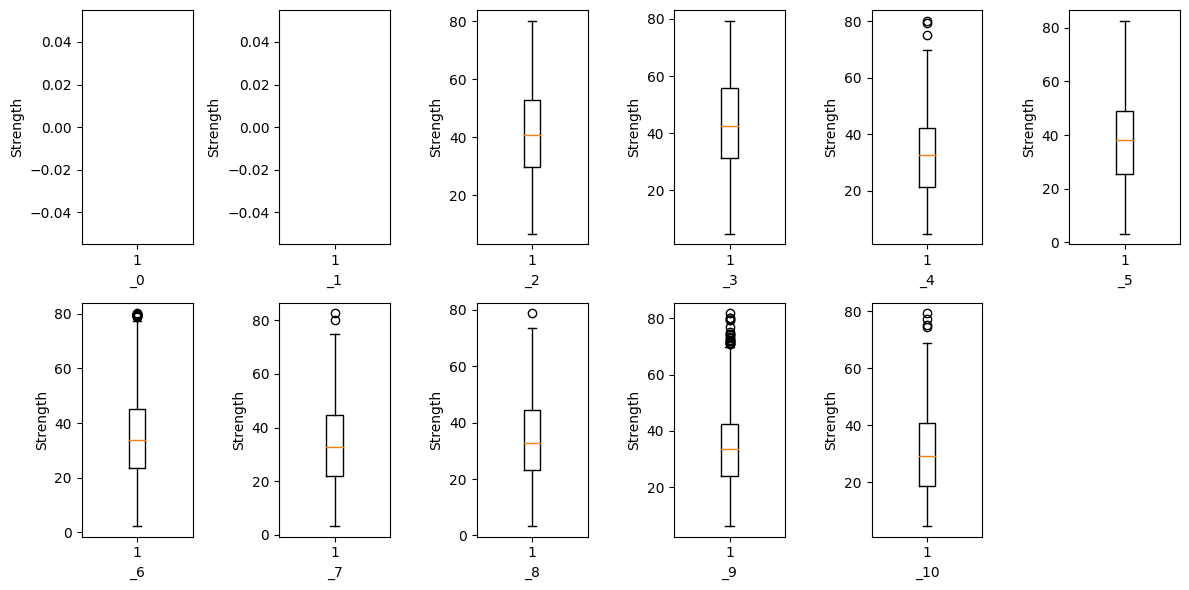

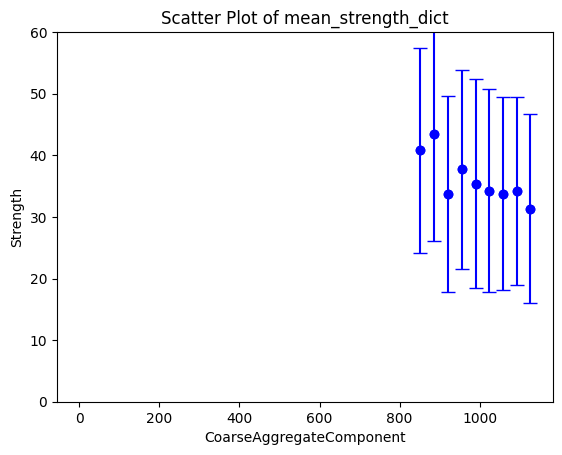

x_column: FineAggregateComponent
max, min: 992.6 594.0
x_ticks [  0.   594.   633.86 673.72 713.58 753.44 793.3  833.16 873.02 912.88
 952.74 992.6 ]
avg_list: [nan, nan, 37.855594795539034, 40.720904255319155, 37.24906565656566, 34.99006872852234, 35.85493434692467, 32.56279050736497, 34.90536028119508, 37.70096103896104, 28.974]
mean_strength_dict: {0.0: nan, 613.9300000000001: nan, 653.79: 37.855594795539034, 693.6500000000001: 40.720904255319155, 733.51: 37.24906565656566, 773.3700000000001: 34.99006872852234, 813.23: 35.85493434692467, 853.0900000000001: 32.56279050736497, 892.95: 34.90536028119508, 932.8100000000002: 37.70096103896104, 972.6700000000001: 28.974}


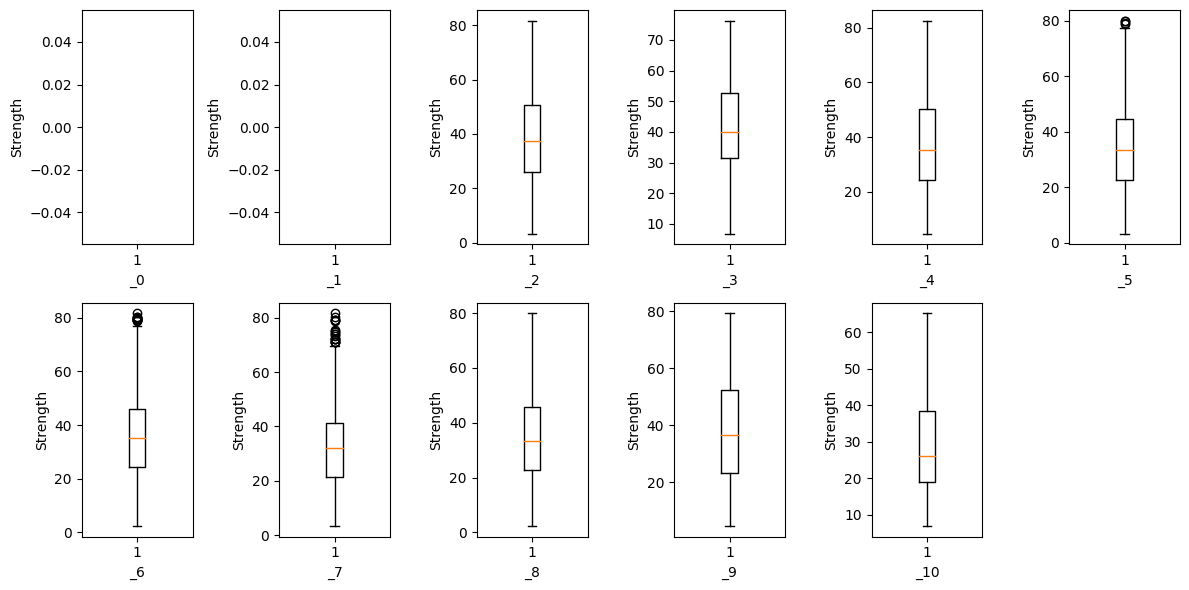

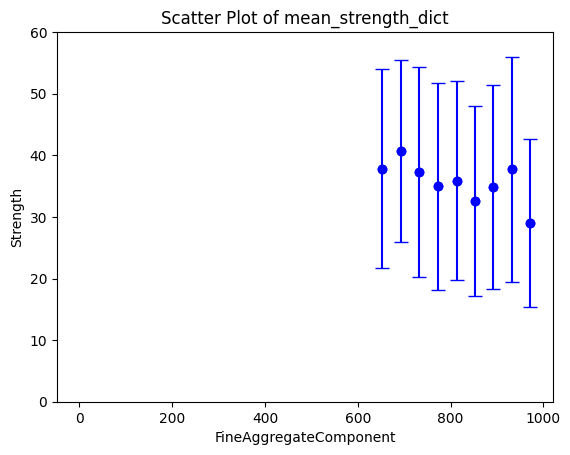

x_column: AgeInDays
max, min: 365 1
x_ticks [  0.    1.   37.4  73.8 110.2 146.6 183.  219.4 255.8 292.2 328.6 365. ]
avg_list: [nan, nan, 30.80388008452192, 52.27614649681529, 45.923018181818186, 36.51933333333333, 41.315113636363634, nan, nan, 48.848000000000006, nan]
mean_strength_dict: {0.0: nan, 19.2: nan, 55.599999999999994: 30.80388008452192, 92.0: 52.27614649681529, 128.39999999999998: 45.923018181818186, 164.8: 36.51933333333333, 201.2: 41.315113636363634, 237.59999999999997: nan, 274.0: nan, 310.4: 48.848000000000006, 346.79999999999995: nan}


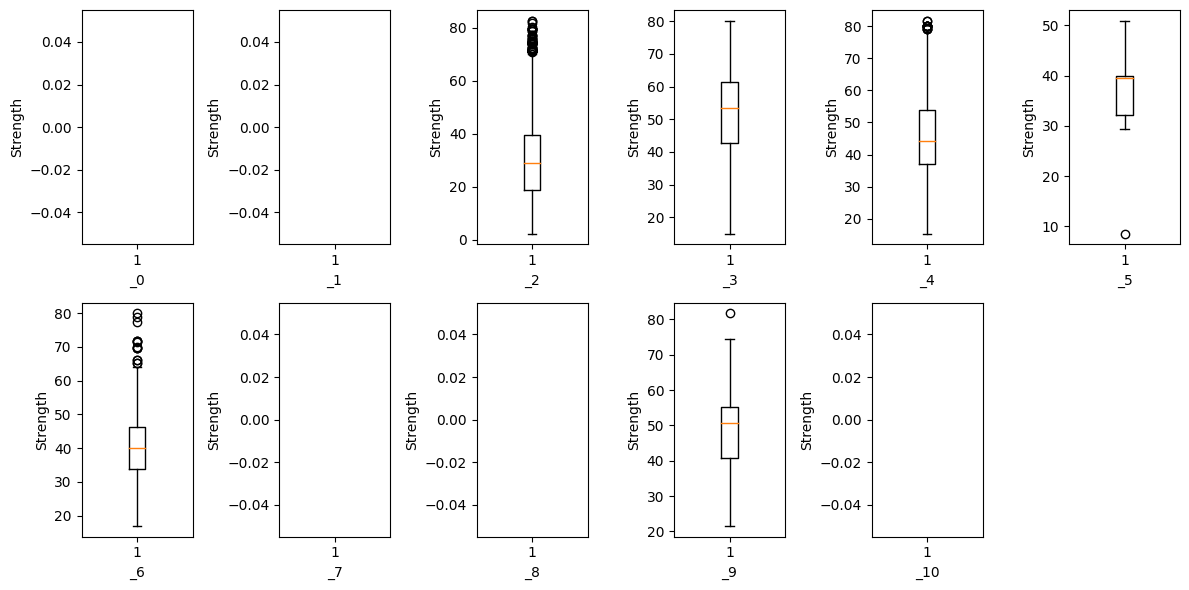

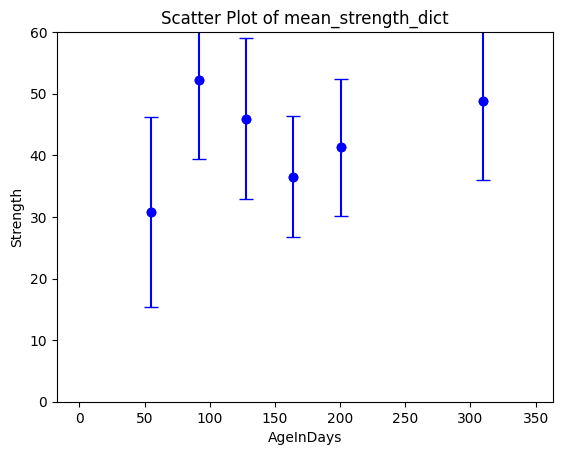

x_column: Strength
max, min: 82.6 2.33
x_ticks [ 0.     2.33  10.357 18.384 26.411 34.438 42.465 50.492 58.519 66.546
 74.573 82.6  ]
avg_list: [nan, nan, 8.052538461538461, 14.620425844346547, 23.26429761904762, 31.010031578947366, 38.614130643611915, 45.971468531468524, 54.02606946983546, 62.04615969581749, 69.93088397790055]
mean_strength_dict: {0.0: nan, 6.3435: nan, 14.3705: 8.052538461538461, 22.397499999999997: 14.620425844346547, 30.424499999999995: 23.26429761904762, 38.451499999999996: 31.010031578947366, 46.4785: 38.614130643611915, 54.50549999999999: 45.971468531468524, 62.53249999999999: 54.02606946983546, 70.55949999999999: 62.04615969581749, 78.5865: 69.93088397790055}


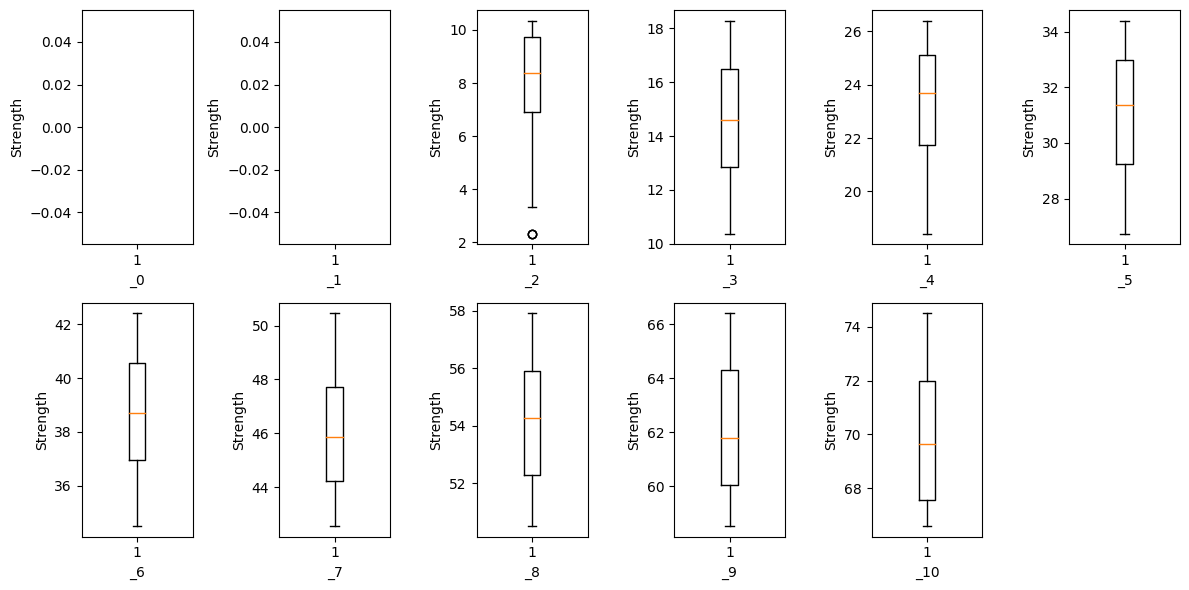

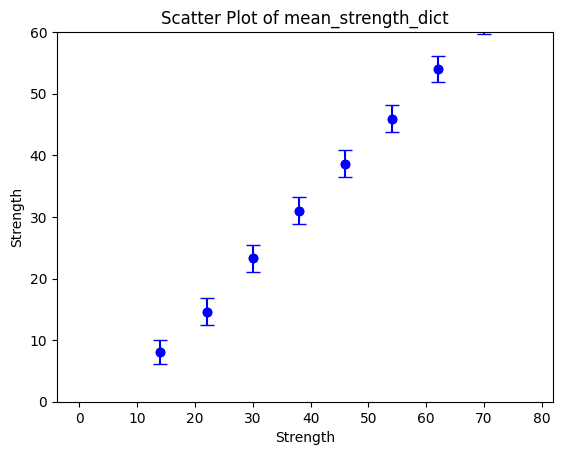

In [ ]:
'''
It's difficult to discern trends from these graphs due to the large variance
'''

for columns in df.columns:
    my_correlation(df, columns)

### Removed Outliers

In [ ]:
def oulier_remover(df, column):
    df = df
    x_column = column

    max_value = df[x_column].max()
    min_value = df[x_column].min()

    step_size = (max_value - min_value) / 10
    x_ticks = np.arange(min_value, max_value + step_size, step_size)

    if len(x_ticks) > 11:
        x_ticks = x_ticks[:11]
    x_ticks = np.insert(x_ticks, 0, 0)

    midpoints = [(x_ticks[i] + x_ticks[i + 1]) / 2 for i in range(1, len(x_ticks) - 1)] # 평균은 x_ticks[1] 부터
    midpoints = np.insert(midpoints, 0, 0).tolist()

    _0 = df[(df[x_column] == x_ticks[0])]
    _1 = df[(df[x_column] >= x_ticks[0]) & (df[x_column] < x_ticks[1])] # 부등호 주의
    _2 = df[(df[x_column] >= x_ticks[1]) & (df[x_column] < x_ticks[2])]
    _3 = df[(df[x_column] >= x_ticks[2]) & (df[x_column] < x_ticks[3])]
    _4 = df[(df[x_column] >= x_ticks[3]) & (df[x_column] < x_ticks[4])]
    _5 = df[(df[x_column] >= x_ticks[4]) & (df[x_column] < x_ticks[5])]
    _6 = df[(df[x_column] >= x_ticks[5]) & (df[x_column] < x_ticks[6])]
    _7 = df[(df[x_column] >= x_ticks[6]) & (df[x_column] < x_ticks[7])]
    _8 = df[(df[x_column] >= x_ticks[7]) & (df[x_column] < x_ticks[8])]
    _9 = df[(df[x_column] >= x_ticks[8]) & (df[x_column] < x_ticks[9])]
    _10 = df[(df[x_column] >= x_ticks[9]) & (df[x_column] < x_ticks[10])]

    subsets = [_0, _1, _2, _3, _4, _5, _6, _7, _8, _9, _10]

    df_no_outliers = {}
    for i, df_sub in enumerate(subsets):
        Q1 = df_sub['Strength'].quantile(0.25)
        Q3 = df_sub['Strength'].quantile(0.75)
        #print('Q1, Q3', Q1, Q3)
        #IQR = Q3 - Q1
        lower_bound = Q1# - 1.5 * IQR
        upper_bound = Q3# + 1.5 * IQR
        #print('lower_bound, upper_bound',lower_bound, upper_bound)

        df_no_outliers[f'df_no_outlier_{i}'] = df_sub[(df_sub['Strength'] >= lower_bound) & (df_sub['Strength'] <= upper_bound)]


    df_concate = pd.concat(df_no_outliers.values(), ignore_index=True)

    return df_concate

x_column: CementComponent
max, min: 491.4 102.0
x_ticks [  0.   102.   140.94 179.88 218.82 257.76 296.7  335.64 374.58 413.52
 452.46 491.4 ]
avg_list: [nan, nan, 30.354883720930232, 32.49877622377622, 32.322350993377476, 31.716734693877548, 33.60262931034483, 33.39330808080808, 33.76934256055363, 38.103701298701296, 46.42614173228347]
mean_strength_dict: {0.0: nan, 121.47: nan, 160.41: 30.354883720930232, 199.35: 32.49877622377622, 238.29: 32.322350993377476, 277.23: 31.716734693877548, 316.16999999999996: 33.60262931034483, 355.11: 33.39330808080808, 394.04999999999995: 33.76934256055363, 432.99: 38.103701298701296, 471.92999999999995: 46.42614173228347}


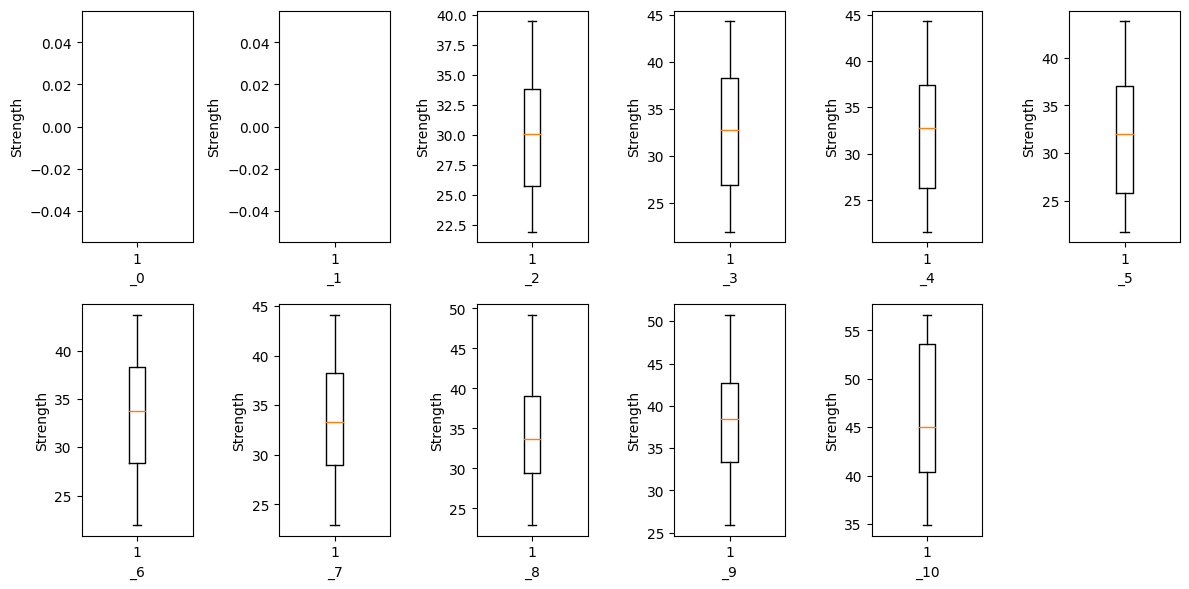

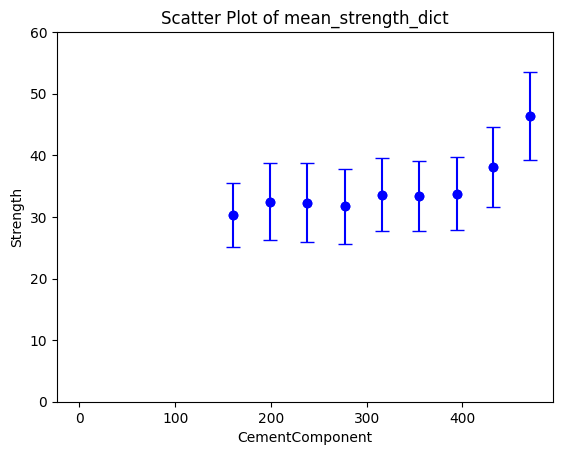

x_column: BlastFurnaceSlag
max, min: 316.1 0.0
x_ticks [  0.     0.    31.61  63.22  94.83 126.44 158.05 189.66 221.27 252.88
 284.49 316.1 ]
avg_list: [32.94028794992175, nan, 32.94628146800121, 41.810136986301366, 41.954523809523806, 39.869519230769235, 33.97457399103139, 35.67550802139037, 35.53684210526316, 34.62525423728814, 41.390952380952385]
mean_strength_dict: {0.0: 32.94028794992175, 15.805000000000001: nan, 47.415000000000006: 32.94628146800121, 79.025: 41.810136986301366, 110.63500000000002: 41.954523809523806, 142.245: 39.869519230769235, 173.85500000000002: 33.97457399103139, 205.46500000000003: 35.67550802139037, 237.07500000000002: 35.53684210526316, 268.685: 34.62525423728814, 300.295: 41.390952380952385}


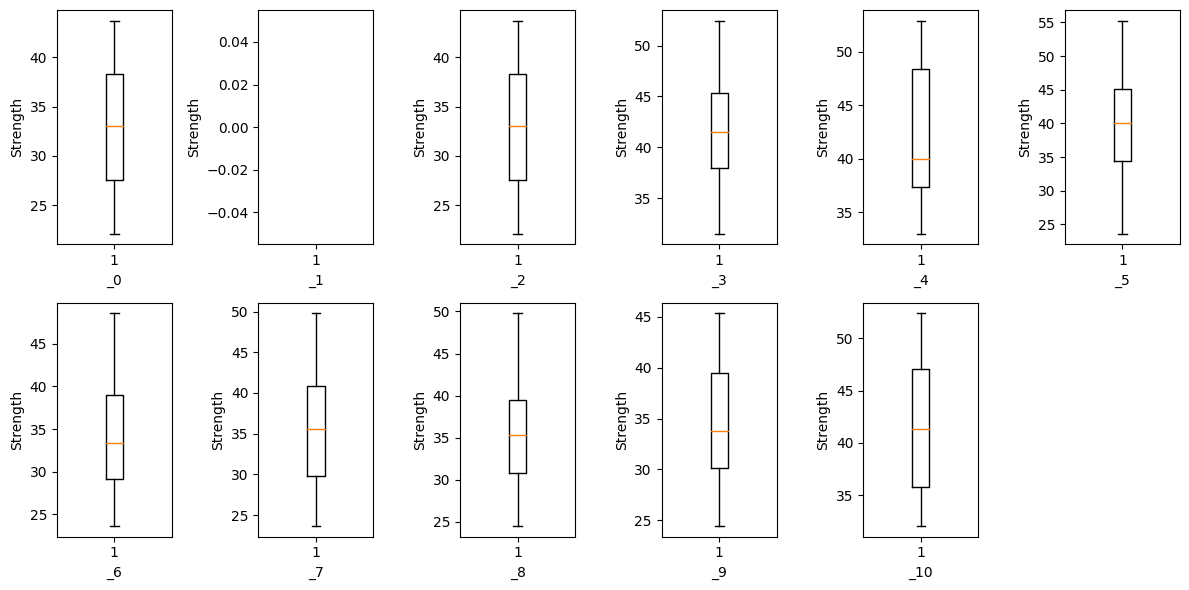

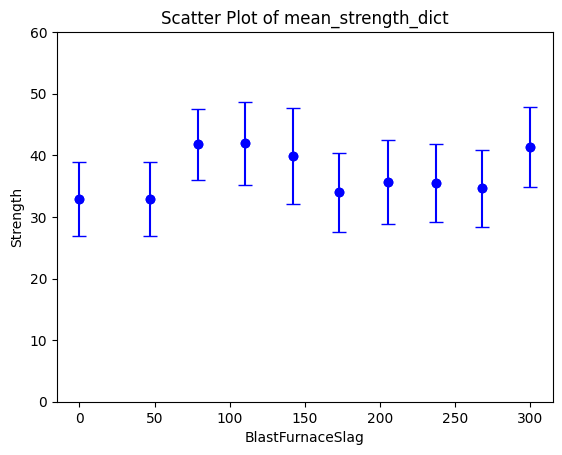

x_column: FlyAshComponent
max, min: 180.0 0.0
x_ticks [  0.   0.  18.  36.  54.  72.  90. 108. 126. 144. 162. 180.]
avg_list: [33.90799898425597, nan, 33.90799898425597, 35.76285714285714, nan, 42.18333333333334, 40.59400000000001, 36.23227979274611, 34.449058823529406, 35.57941176470589, 36.632]
mean_strength_dict: {0.0: 33.90799898425597, 9.0: nan, 27.0: 33.90799898425597, 45.0: 35.76285714285714, 63.0: nan, 81.0: 42.18333333333334, 99.0: 40.59400000000001, 117.0: 36.23227979274611, 135.0: 34.449058823529406, 153.0: 35.57941176470589, 171.0: 36.632}


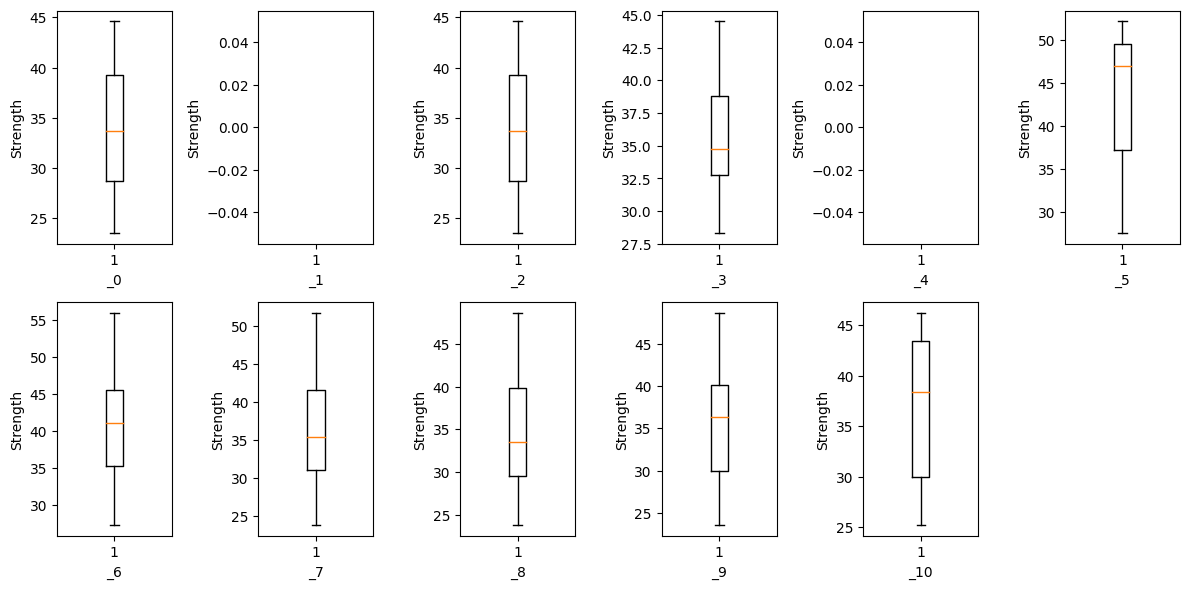

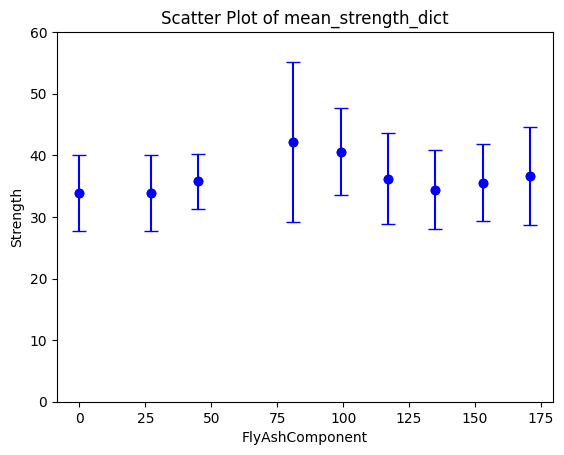

x_column: WaterComponent
max, min: 228.0 121.8
x_ticks [  0.   121.8  132.42 143.04 153.66 164.28 174.9  185.52 196.14 206.76
 217.38 228.  ]
avg_list: [nan, nan, 41.42235294117648, 44.3014705882353, 45.222424242424246, 40.19435897435898, 37.227651821862345, 34.11148571428571, 31.70534325889164, 32.67674657534246, 36.70046511627907]
mean_strength_dict: {0.0: nan, 127.10999999999999: nan, 137.72999999999996: 41.42235294117648, 148.34999999999997: 44.3014705882353, 158.96999999999997: 45.222424242424246, 169.58999999999997: 40.19435897435898, 180.20999999999992: 37.227651821862345, 190.82999999999993: 34.11148571428571, 201.44999999999993: 31.70534325889164, 212.06999999999994: 32.67674657534246, 222.68999999999988: 36.70046511627907}


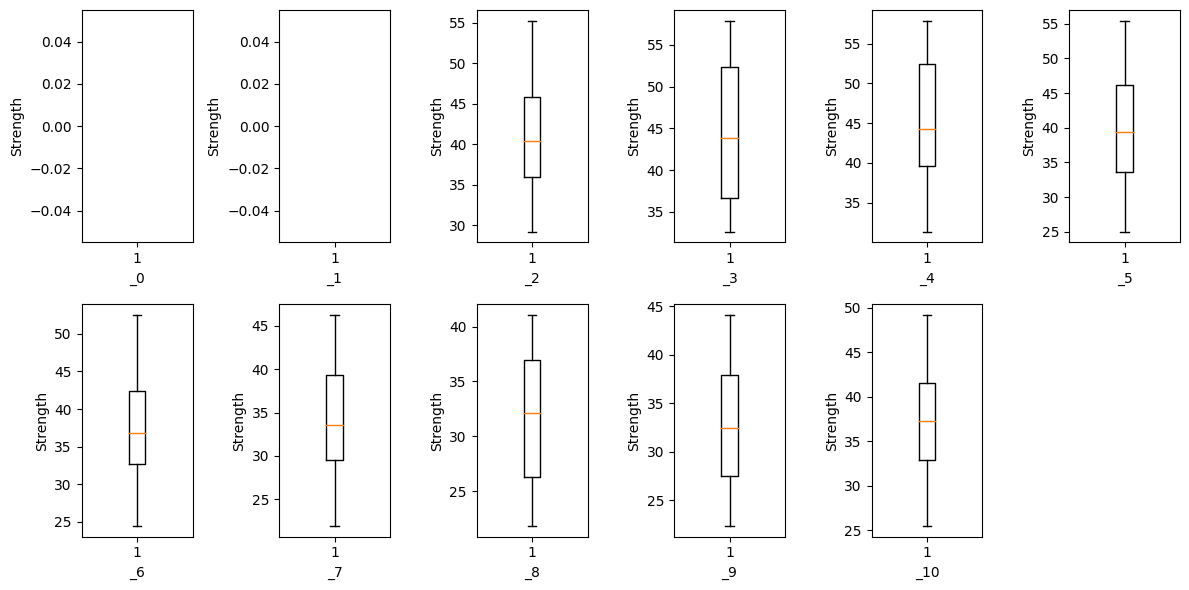

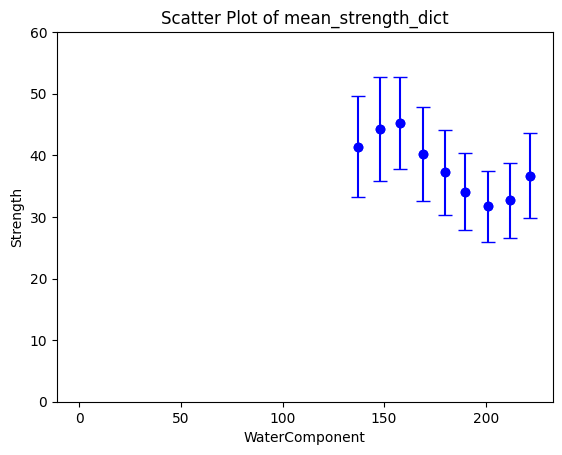

x_column: SuperplasticizerComponent
max, min: 28.2 0.0
x_ticks [ 0.    0.    2.82  5.64  8.46 11.28 14.1  16.92 19.74 22.56 25.38 28.2 ]
avg_list: [32.02608351787409, nan, 32.02421648835745, 35.466952380952385, 35.54486338797814, 38.22184952978056, 39.75406779661017, 43.385978260869564, 51.24294117647059, 50.36000000000001, 43.637]
mean_strength_dict: {0.0: 32.02608351787409, 1.41: nan, 4.2299999999999995: 32.02421648835745, 7.049999999999999: 35.466952380952385, 9.87: 35.54486338797814, 12.69: 38.22184952978056, 15.509999999999998: 39.75406779661017, 18.33: 43.385978260869564, 21.15: 51.24294117647059, 23.97: 50.36000000000001, 26.79: 43.637}


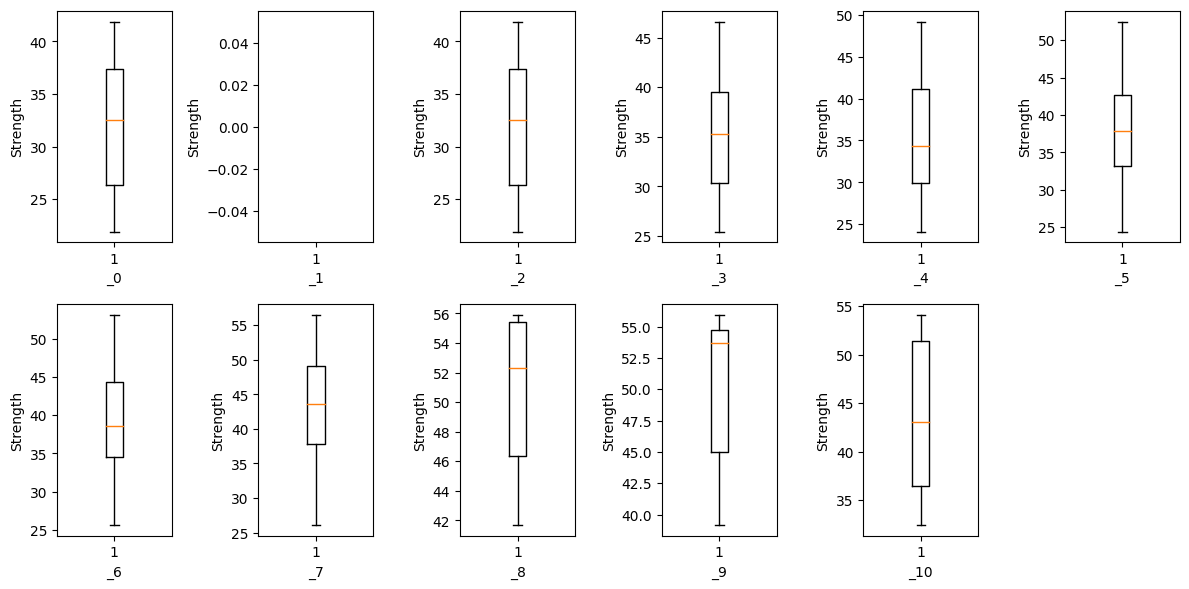

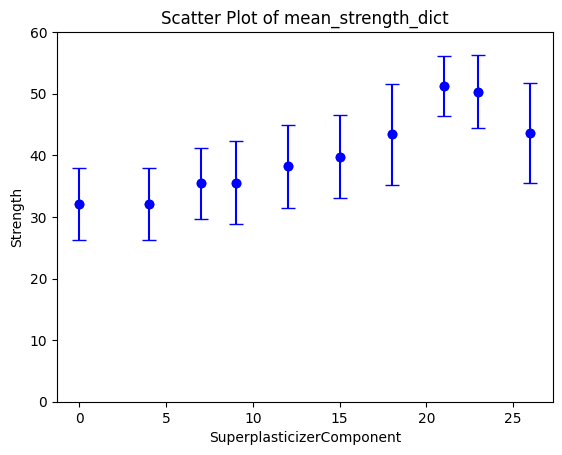

x_column: CoarseAggregateComponent
max, min: 1104.6 801.0
x_ticks [   0.    801.    831.36  861.72  892.08  922.44  952.8   983.16 1013.52
 1043.88 1074.24 1104.6 ]
avg_list: [nan, nan, 39.961296296296304, 44.04023622047244, 33.04754098360656, 37.031166666666664, 36.399637826961765, 33.269007092198585, 33.3606746031746, 33.22222222222222, 33.372608695652175]
mean_strength_dict: {0.0: nan, 816.1800000000001: nan, 846.54: 39.961296296296304, 876.9000000000001: 44.04023622047244, 907.26: 33.04754098360656, 937.6200000000001: 37.031166666666664, 967.98: 36.399637826961765, 998.3400000000001: 33.269007092198585, 1028.7: 33.3606746031746, 1059.0600000000002: 33.22222222222222, 1089.42: 33.372608695652175}


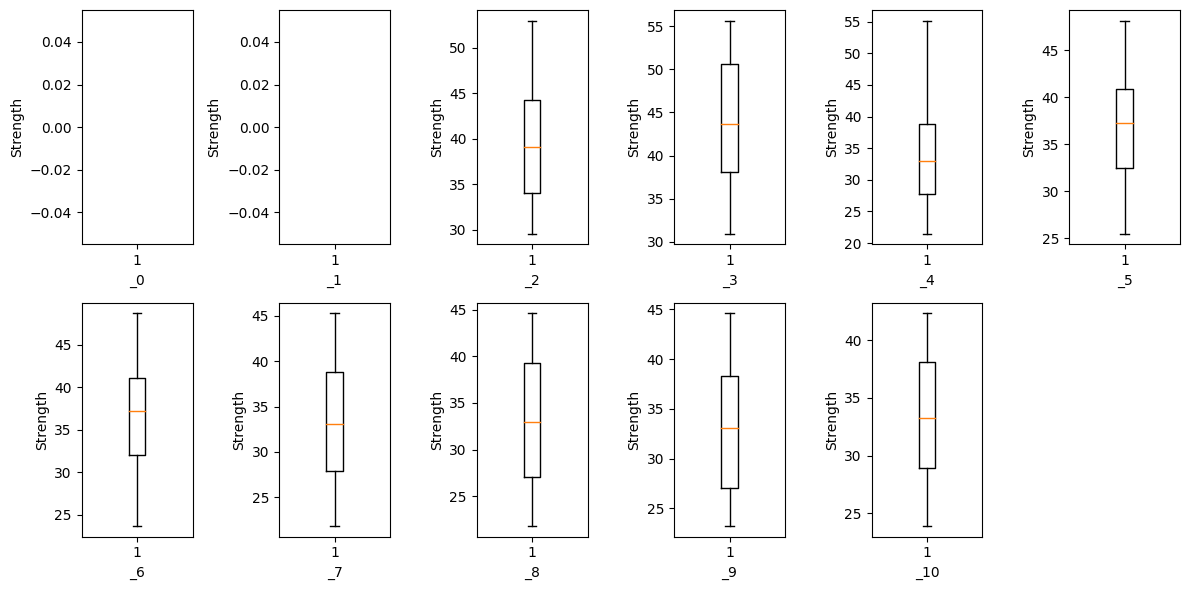

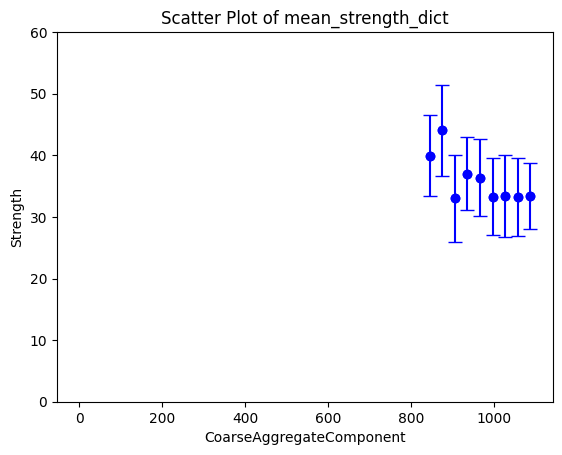

x_column: FineAggregateComponent
max, min: 945.0 594.0
x_ticks [  0.  594.  629.1 664.2 699.3 734.4 769.5 804.6 839.7 874.8 909.9 945. ]
avg_list: [nan, nan, 37.615877551020404, 38.607090909090914, 37.69184782608695, 34.15957547169811, 34.63331905781584, 34.00975177304964, 31.71694045174538, 33.53076923076923, 36.57756476683938]
mean_strength_dict: {0.0: nan, 611.55: nan, 646.6500000000001: 37.615877551020404, 681.75: 38.607090909090914, 716.8500000000001: 37.69184782608695, 751.95: 34.15957547169811, 787.0500000000002: 34.63331905781584, 822.1500000000001: 34.00975177304964, 857.2500000000002: 31.71694045174538, 892.3500000000001: 33.53076923076923, 927.4500000000003: 36.57756476683938}


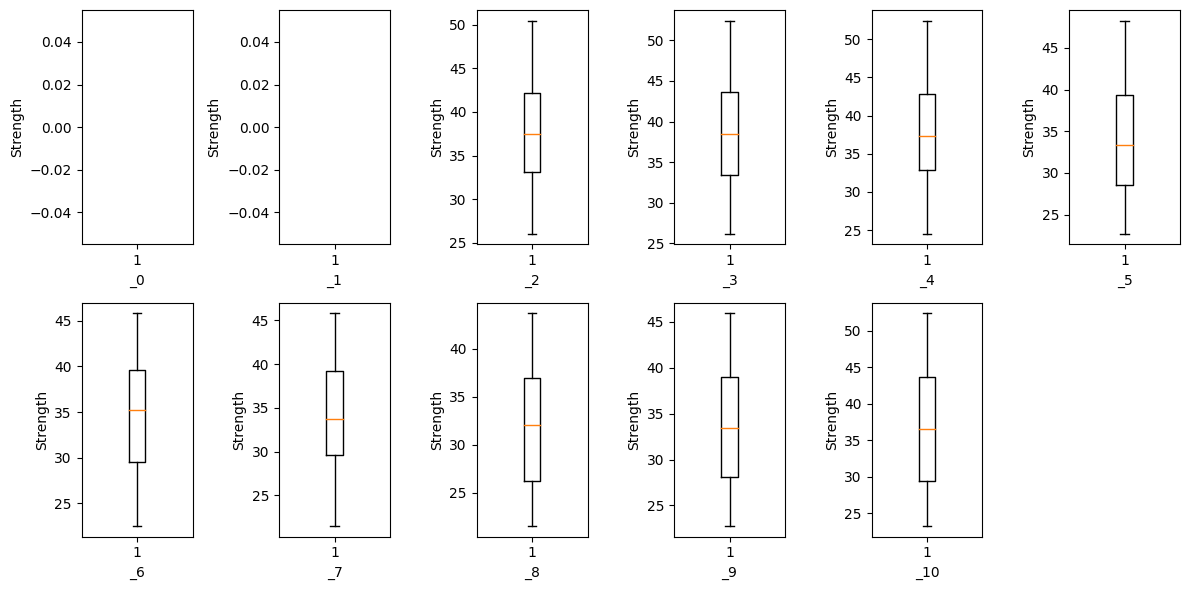

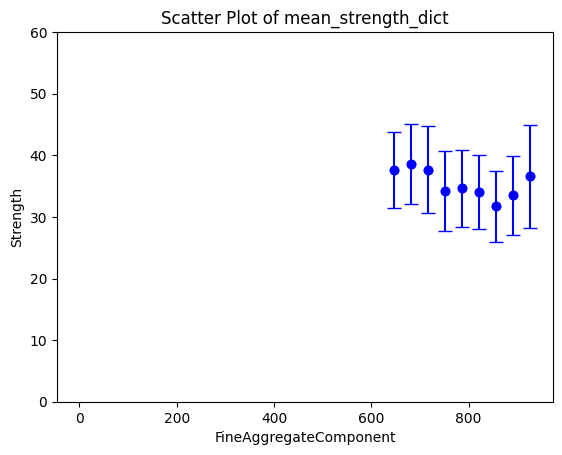

x_column: AgeInDays
max, min: 270 1
x_ticks [  0.    1.   27.9  54.8  81.7 108.6 135.5 162.4 189.3 216.2 243.1 270. ]
avg_list: [nan, nan, 26.977861035422343, 30.529040274207368, 52.4423717948718, 44.55922518159806, 38.37857142857143, nan, 39.96834586466165, nan, nan]
mean_strength_dict: {0.0: nan, 14.45: nan, 41.349999999999994: 26.977861035422343, 68.25: 30.529040274207368, 95.14999999999999: 52.4423717948718, 122.05: 44.55922518159806, 148.95: 38.37857142857143, 175.84999999999997: nan, 202.75: 39.96834586466165, 229.64999999999998: nan, 256.55: nan}


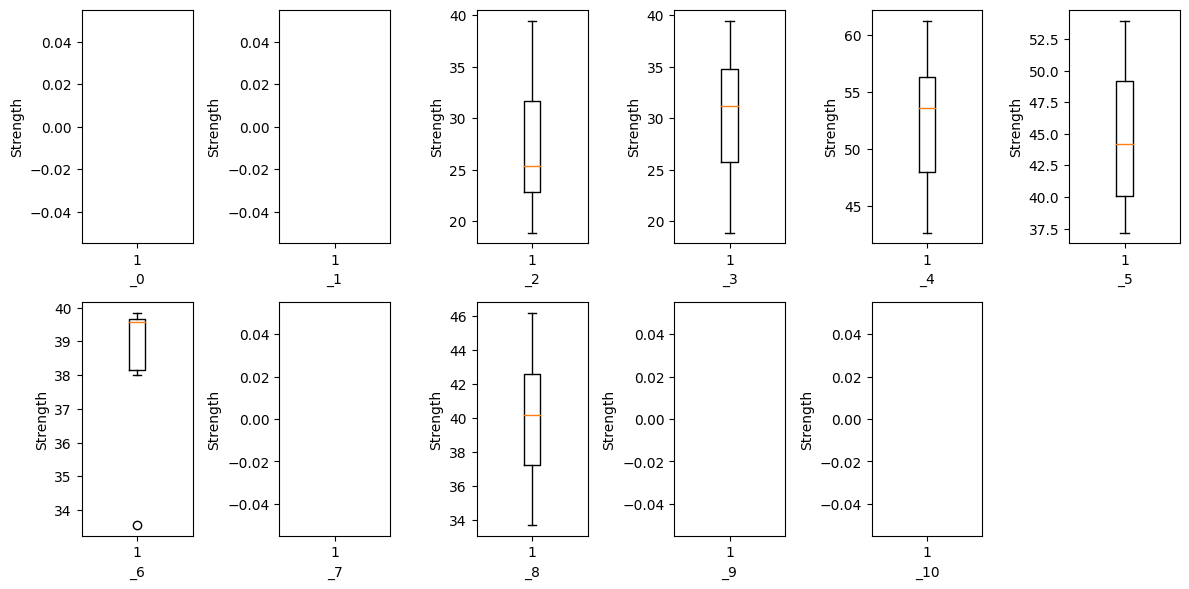

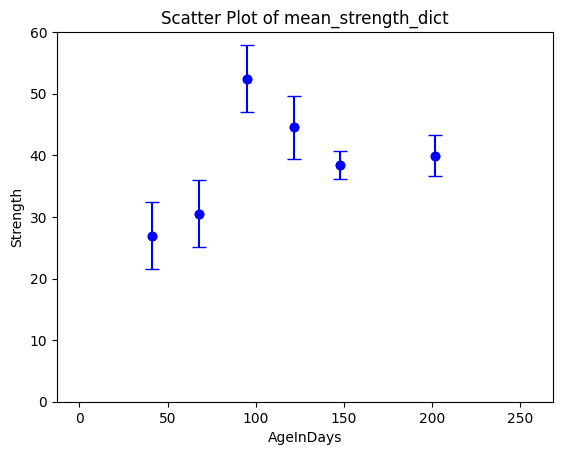

x_column: Strength
max, min: 71.99 6.9
x_ticks [ 0.     6.9   13.409 19.918 26.427 32.936 39.445 45.954 52.463 58.972
 65.481 71.99 ]
avg_list: [nan, nan, 10.032211538461537, 14.910286738351255, 23.55775175644028, 31.233863134657835, 37.94453460620525, 42.62024137931034, 48.08571428571429, 54.449221311475405, 61.909208633093535]
mean_strength_dict: {0.0: nan, 10.154499999999999: nan, 16.6635: 10.032211538461537, 23.172499999999996: 14.910286738351255, 29.681499999999993: 23.55775175644028, 36.19049999999999: 31.233863134657835, 42.699499999999986: 37.94453460620525, 49.20849999999999: 42.62024137931034, 55.71749999999999: 48.08571428571429, 62.22649999999999: 54.449221311475405, 68.7355: 61.909208633093535}


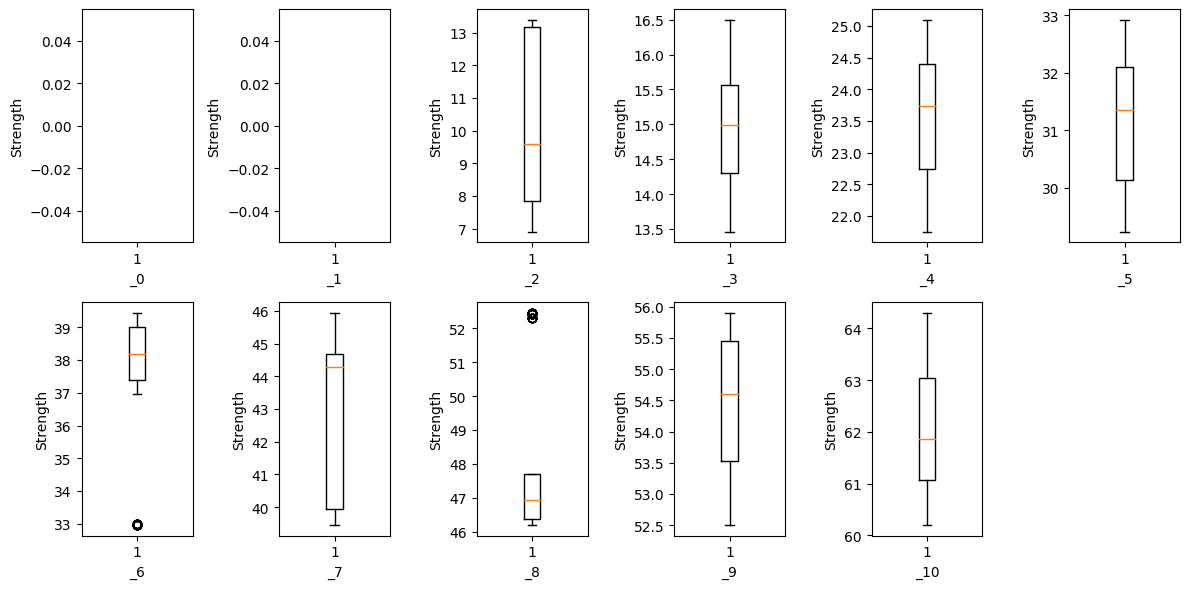

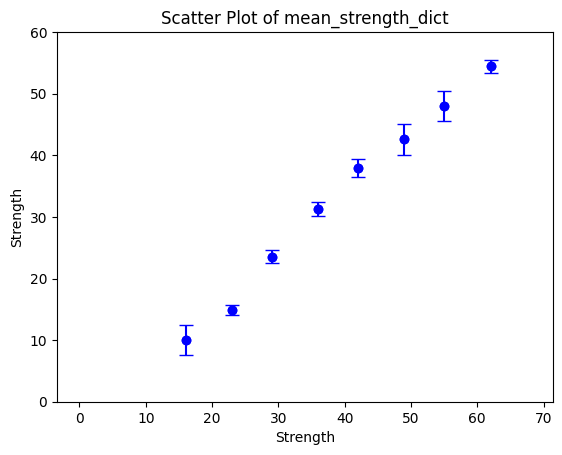

In [ ]:
for column in df.columns:
    df_cut_outlier = oulier_remover(df, column)
    my_correlation(df_cut_outlier, column)

## Identifying trends in the data

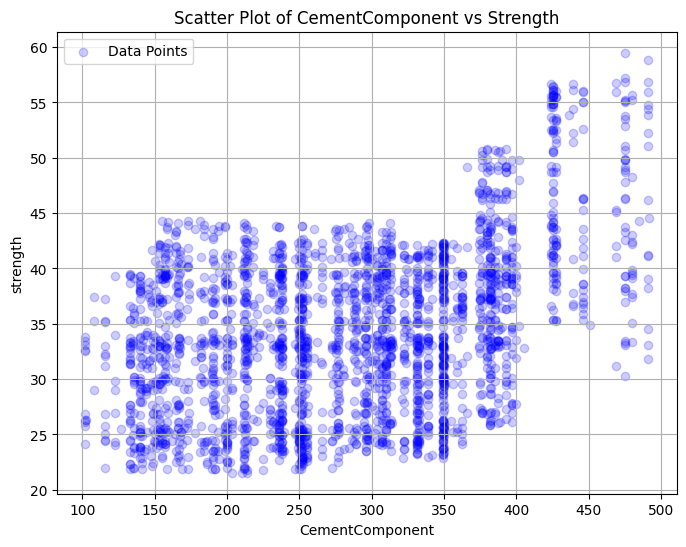

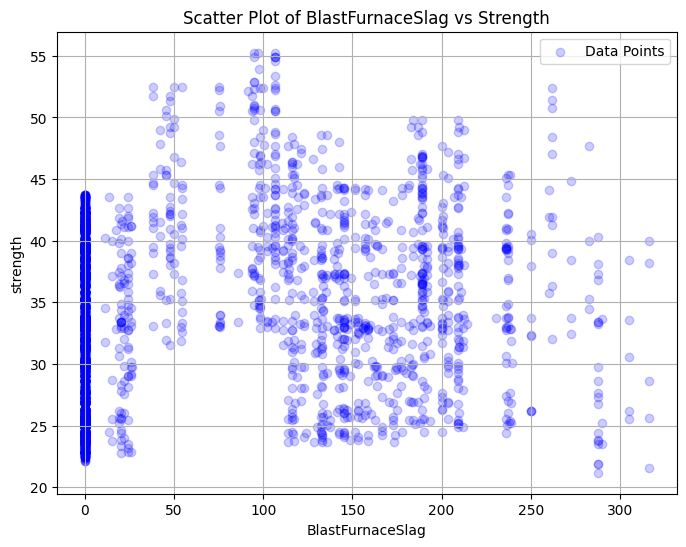

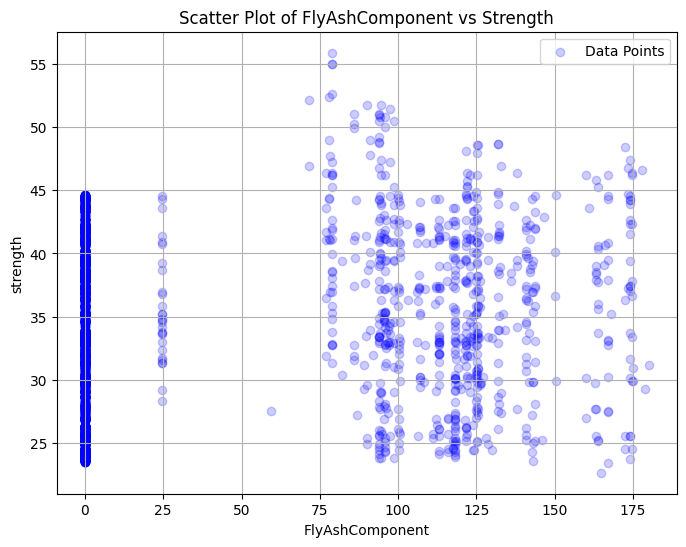

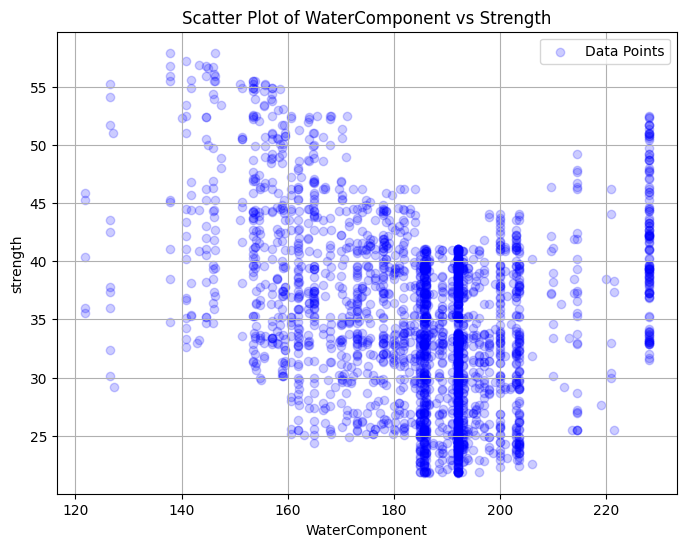

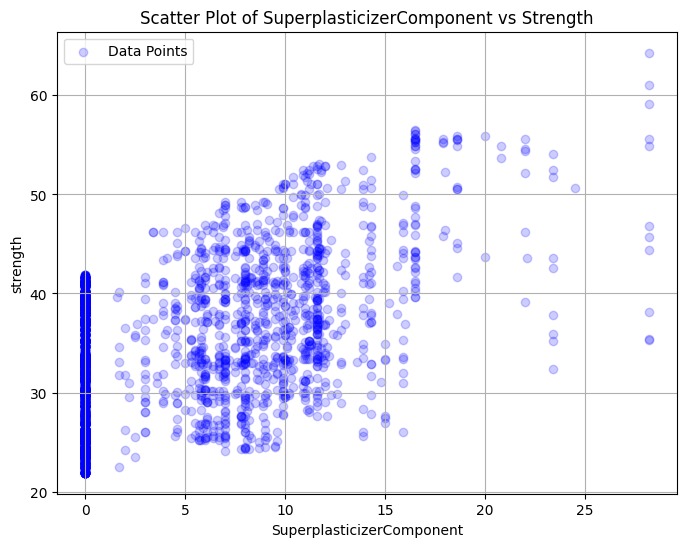

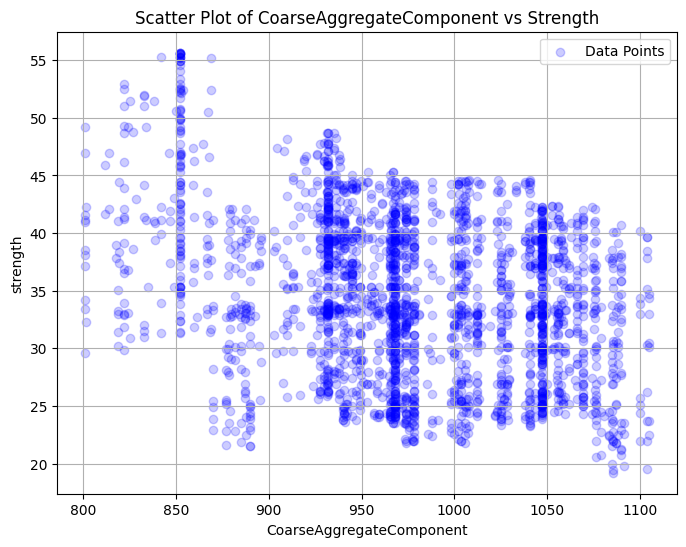

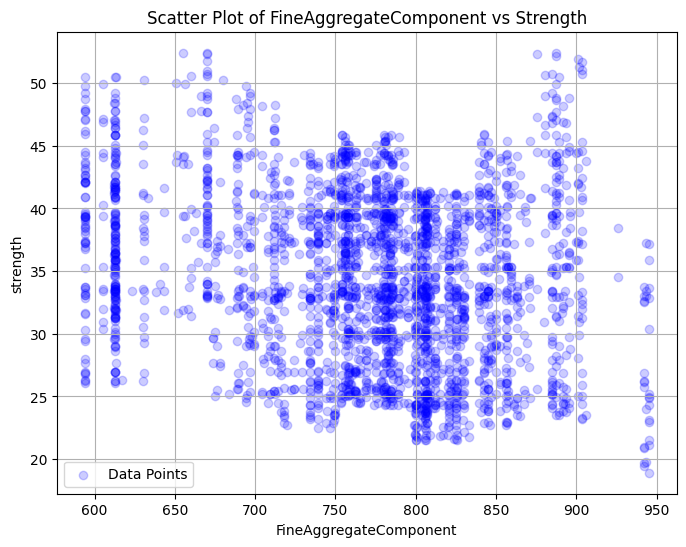

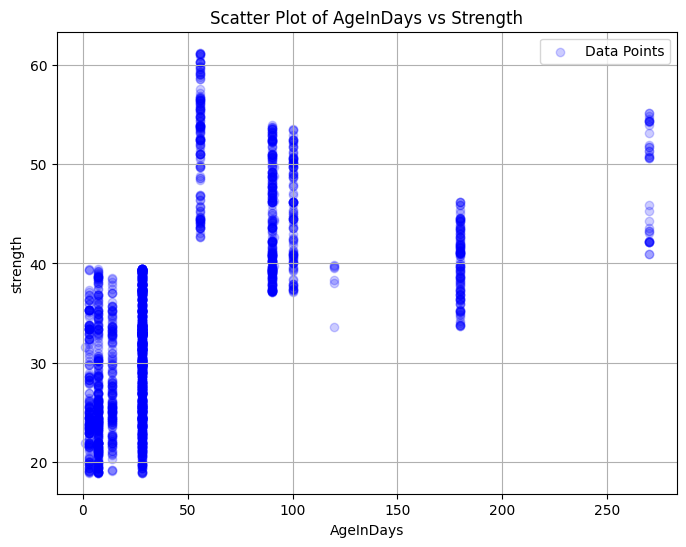

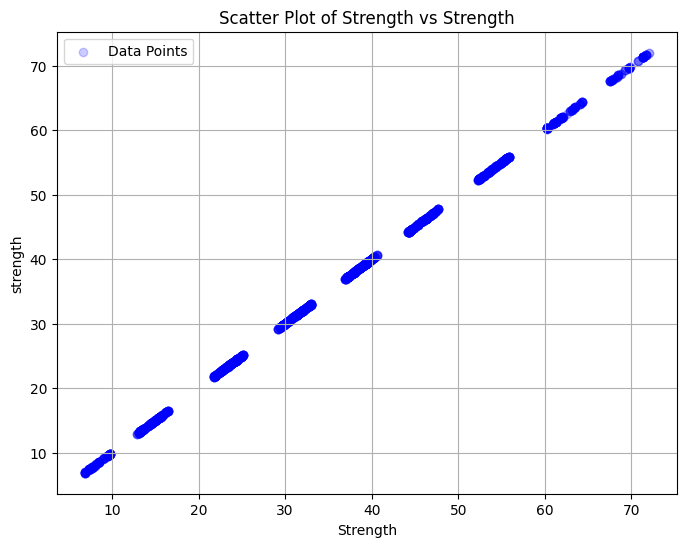

In [ ]:
for column in df.columns:
    df_abc = oulier_remover(df, column)
    plt.figure(figsize=(8, 6))  # Optional: Set the size of the figure
    plt.scatter(df_abc[column], df_abc['Strength'], color='b', label='Data Points', alpha = 0.2)  # Scatter plot
    plt.xlabel(column)  # X-axis label
    plt.ylabel('strength')  # Y-axis label
    plt.title(f'Scatter Plot of {column} vs Strength')  # Title of the plot
    plt.legend()  # Show legend
    plt.grid(True)  # Show gridlines (optional)
    plt.show()  # Show the plot

# Data Preprocessing

In [ ]:
# This block is used to reset the data frame to its initial state.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

df = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sample_submission.csv')

DataPreprocessing(df)
DataPreprocessing(df_test)

In [ ]:
class df_preprocessor:
    def __init__(self, df):
        self.df = df
        self.operations = []

    def clip_column(self, column, lower_limit=None, upper_limit=None):
        if lower_limit is None and upper_limit is None:
            self.operations.append(f'열 "{column}"에 대한 클리핑이 적용되지 않았습니다.')
            return self.df

        def clip_values(value, lower_limit, upper_limit):
            if lower_limit is not None:
                value = max(lower_limit, value)
            if upper_limit is not None:
                value = min(upper_limit, value)
            return value

        self.df[column] = self.df[column].apply(lambda value: clip_values(value, lower_limit, upper_limit))
        self.operations.append(f'열 "{column}"을(를) {lower_limit}부터 {upper_limit}까지 클리핑했습니다.')
        return self.df

    def binary_encode_columns(self, *args):
        columns = [*args]
        for column in columns:
            self.df[column] = self.df[column] != 0
            self.operations.append(f'Binary encoded column "{column}"')

        return self.df

    def drop_columns(self, *args):
        columns = [*args]
        self.df = self.df.drop(columns, axis=1)
        self.operations.append(f'Dropped columns: {columns}')
        return self.df

    def print_operations(self):
        print("Operations performed:")
        for operation in self.operations:
            print(operation)

In [ ]:
# Train data preprocessing
df_preprocessed = df_preprocessor(df)
df_preprocessed.clip_column('WaterComponent', lower_limit=160, upper_limit=None)
df_preprocessed.clip_column('AgeInDays', lower_limit=None, upper_limit=40)
df_preprocessed.binary_encode_columns('BlastFurnaceSlag', 'FlyAshComponent', 'SuperplasticizerComponent')
df_preprocessed.drop_columns('FlyAshComponent')
df_pp = df_preprocessed.df

In [ ]:
df_preprocessed.print_operations()

Operations performed:
열 "WaterComponent"을(를) 160부터 None까지 클리핑했습니다.
열 "AgeInDays"을(를) None부터 40까지 클리핑했습니다.
Binary encoded column "BlastFurnaceSlag"
Binary encoded column "FlyAshComponent"
Binary encoded column "SuperplasticizerComponent"
Dropped columns: ['FlyAshComponent']


In [ ]:
# Test data preprocessing
df_test_preprocessed = df_preprocessor(df_test)
df_test_preprocessed.clip_column('WaterComponent', lower_limit=160, upper_limit=None)
df_test_preprocessed.clip_column('AgeInDays', lower_limit=None, upper_limit=40)
df_test_preprocessed.binary_encode_columns('BlastFurnaceSlag', 'FlyAshComponent', 'SuperplasticizerComponent')
df_test_preprocessed.drop_columns('FlyAshComponent')
df_test_pp = df_test_preprocessed.df

In [ ]:
df_test_preprocessed.print_operations()

Operations performed:
열 "WaterComponent"을(를) 160부터 None까지 클리핑했습니다.
열 "AgeInDays"을(를) None부터 40까지 클리핑했습니다.
Binary encoded column "BlastFurnaceSlag"
Binary encoded column "FlyAshComponent"
Binary encoded column "SuperplasticizerComponent"
Dropped columns: ['FlyAshComponent']


## The Results of Preprocessing

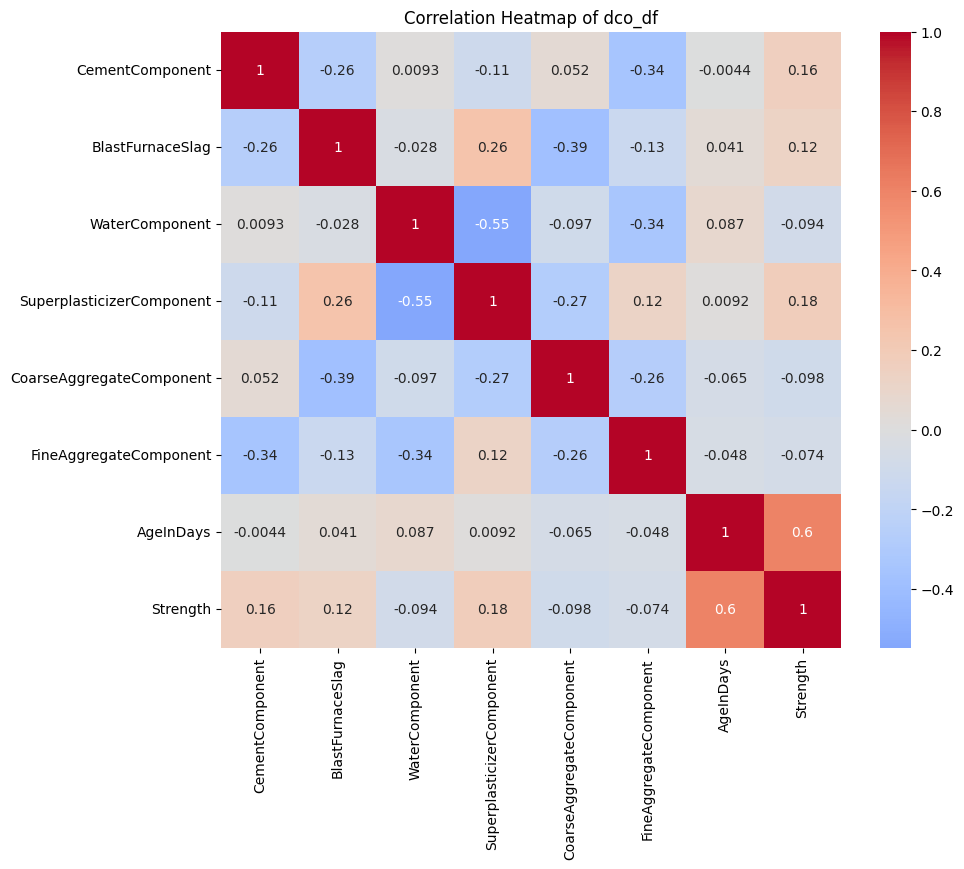

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_pp.corr(), annot=True, cmap='coolwarm', center=0)

# Add labels and title
plt.title('Correlation Heatmap of dco_df')
plt.show()

# Train/Valid/Test

In [ ]:
from sklearn.model_selection import train_test_split

X = df_pp.drop(columns=['Strength'])
y = df_pp['Strength']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_test = df_test_pp

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape, X_test.shape

((4325, 7), (1082, 7), (4325,), (1082,), (3605, 7))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
# X_valid_scaled = scaler_X.transform(X_valid)
print(X_train_scaled.shape)
print(X_train_scaled)

(4325, 7)
[[-0.20958166 -0.84231002 -1.55339466 ... -0.23679733  1.32978384
   0.2256898 ]
 [ 1.1896904   1.18721133 -1.58990474 ... -0.7267959   0.41528822
  -1.34542048]
 [ 0.59932815  1.18721133 -1.29173912 ... -0.61431601 -0.19395156
   1.1234671 ]
 ...
 [ 2.27769774 -0.84231002 -0.78668308 ...  1.71673257 -2.00768001
  -1.34542048]
 [ 1.8992604   1.18721133  0.84410028 ...  1.71673257 -2.01022381
   1.1234671 ]
 [-0.12254107  1.18721133 -1.58990474 ...  0.16011444  0.41528822
  -1.34542048]]


# Models

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_lr = LinearRegression()
results_lr = model_lr.fit(X_train_scaled, y_train)

X_valid_scaled = scaler_X.transform(X_valid) # adjust scaler to X_validation
prediction_lr = results_lr.predict(X_valid_scaled)

mse_lr = mean_squared_error(y_valid, prediction_lr)
rmse_lr = np.sqrt(mse_lr)
print("Mean Squared Error_lr:", rmse_lr)

# Results : Mean Squared Error_lr: 12.861457338533807

Mean Squared Error_lr: 11.974347974030035


In [ ]:
# Submission
X_test_scaled = scaler_X.transform(X_test) # adjust scaler to X_validation
prediction = results_lr.predict(X_test_scaled)
submission['Strength'] = prediction
submission.to_csv('submission_lr_231029.csv', index = False)

### Linear Regression with Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores_lr = cross_val_score(model_lr, X_train_scaled, y_train, scoring = "neg_mean_squared_error", cv = 100)

X_valid_scaled = scaler_X.transform(X_valid)
predictions_lr_cv = model_lr.predict(X_valid_scaled)

rmse_lr_cv = np.sqrt(mean_squared_error(y_valid, predictions_lr_cv))
print("Root Mean Squared Error_lr_cv:", rmse_lr_cv ) # Results : Root Mean Squared Error_lrcv: 14.397013420166472

Root Mean Squared Error_lr_cv: 11.974347974030035


In [ ]:
# Submission
X_test_scaled = scaler_X.transform(X_test)
y_test_pred = model_lr.predict(X_test_scaled)
submission['Strength'] = y_test_pred
submission.to_csv('submission_lrCV_231029.csv', index=False)

# Results : private: # 12.51684, public: 12.211 #607

### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

degree = 2

polyreg = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('linear', LinearRegression())])

polyreg.fit(X_train_scaled, y_train)

X_valid_scaled = scaler_X.transform(X_valid)
y_valid_pred = polyreg.predict(X_valid_scaled)

mse_valid = mean_squared_error(y_valid, y_valid_pred)

rmse_valid = np.sqrt(mse_valid)

print(f'Root Mean Squared Error on Validation Data: {rmse_valid:.2f}') # 12.07

Root Mean Squared Error on Validation Data: 11.94


In [ ]:
# Submission
X_test_scaled = scaler_X.transform(X_test)
y_test_pred = polyreg.predict(X_test_scaled)
submission['Strength'] = y_test_pred
submission.to_csv('submission_polyreg_231029.csv', index=False)

# Results : private: # 12.51684, public: 12.211 #607

### DecisionTree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model_dtr = DecisionTreeRegressor()
results_dtr = model_dtr.fit(X_train_scaled, y_train)

X_valid_scaled = scaler_X.transform(X_valid)
prediction = results_dtr.predict(X_valid_scaled)

mse_dtr = mean_squared_error(y_valid, prediction)
rmse_dtr = np.sqrt(mse_dtr)
print("Mean Squared Error_dtr:", rmse_dtr)

# Results : Mean Squared Error_dtr: 15.184002792823556

Mean Squared Error_dtr: 14.820732338176404


AgeInDays                    0.478980
CementComponent              0.143341
FineAggregateComponent       0.108881
CoarseAggregateComponent     0.107119
WaterComponent               0.105562
SuperplasticizerComponent    0.034709
BlastFurnaceSlag             0.021409
dtype: float64


<Axes: >

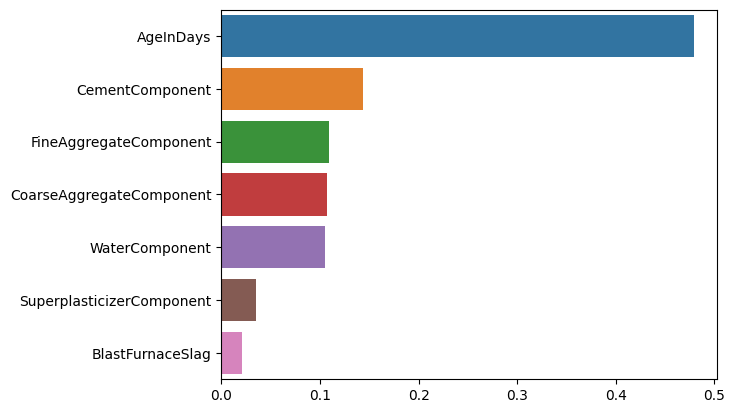

In [ ]:
dtr_data = pd.Series(model_dtr.feature_importances_, X_train.columns)

dtr_data.sort_values(ascending = False, inplace = True) # inplace = True, 원본 수정

print(dtr_data)
sns.barplot( x = dtr_data, y = dtr_data.index)

### Decision Tree Regressor with Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores_dtr = cross_val_score(model_dtr, X_train_scaled, y_train, scoring = "neg_mean_squared_error", cv = 100)

X_valid_scaled = scaler_X.transform(X_valid)
predictions_dtr_cv = model_dtr.predict(X_valid_scaled)

rmse_dtr_cv = np.sqrt(mean_squared_error(y_valid, predictions_dtr_cv))
print("Root Mean Squared Error_dtr_cv:", rmse_dtr_cv ) # Results : Root Mean Squared Error_dtr_cv: 15.18400279282355

Root Mean Squared Error_dtr_cv: 14.820732338176404


### Ridge model

In [ ]:
from sklearn.linear_model import Ridge

alphas = [0, 1, 10, 100]

best_alpha = None
best_rmse = float('inf')

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores_ridge = cross_val_score(ridge, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=100)
    rmse_ridge = np.sqrt(-1 * scores_ridge.mean())
    print("Alpha:", alpha, "RMSE:", rmse_ridge)

    if rmse_ridge < best_rmse:
        best_rmse = rmse_ridge
        best_alpha = alpha

best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train_scaled, y_train)


X_valid_scaled = scaler_X.transform(X_valid)
predictions_ridge = best_ridge_model.predict(X_valid_scaled)

rmse_ridge = np.sqrt(mean_squared_error(y_valid, predictions_ridge))

print("Root Mean Squared Error_dtr_cv:", rmse_ridge ) # Results : Root Mean Squared Error_dtr_cv: 14.40781609820049

Alpha: 0 RMSE: 12.364673827190671
Alpha: 1 RMSE: 12.364666122897463
Alpha: 10 RMSE: 12.364625264324676
Alpha: 100 RMSE: 12.366819876326039
Root Mean Squared Error_dtr_cv: 11.974061575822624


In [ ]:
# Submission
X_test_scaled = scaler_X.transform(X_test)
y_test_pred = best_ridge_model.predict(X_test_scaled)
submission['Strength'] = y_test_pred
submission.to_csv('submission_Ridge_231029.csv', index=False)

# Results : private: # 12.51684, public: 12.211 #607

### Esemble

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor()
results_rfr = model_rfr.fit(X_train_scaled, y_train)

X_valid_scaled = scaler_X.transform(X_valid) # adjust scaler at X_validation
prediction = results_rfr.predict(X_valid_scaled)

mse_rfr = mean_squared_error(y_valid, prediction)
rmse_rfr = np.sqrt(mse_rfr)
print("Mean Squared Error_rfr:", rmse_rfr) # Result : Mean Squared Error_rfr: 12.519070905481474

Mean Squared Error_rfr: 12.555515206986875


AgeInDays                    0.456957
CementComponent              0.151816
CoarseAggregateComponent     0.119082
FineAggregateComponent       0.113255
WaterComponent               0.107015
SuperplasticizerComponent    0.032788
BlastFurnaceSlag             0.019087
dtype: float64


<Axes: >

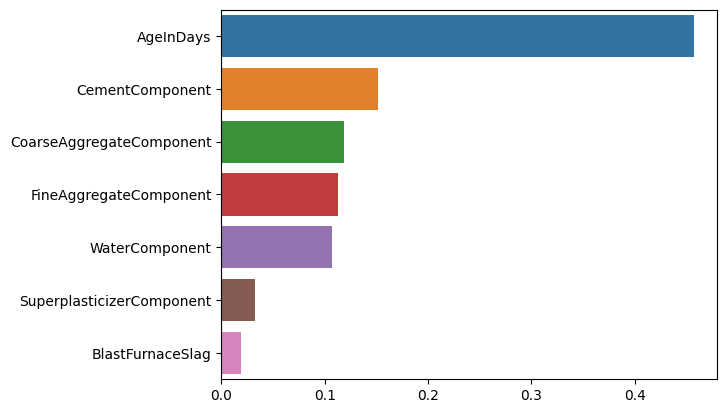

In [ ]:
rfr_data = pd.Series(model_rfr.feature_importances_, index = X_train.columns)

rfr_data.sort_values(ascending = False, inplace = True) # inplace = True, 원본 수정

print(rfr_data)
sns.barplot( x = rfr_data, y = rfr_data.index)

### 규제 기본 모델 + cv + grid search + 하이퍼파라미터

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [ ]:
model_lasso = Lasso()
param_grid = {
    'max_iter':[1000, 2000, 3000],
    'alpha': 1/np.array([0.01, 0.1, 1, 2, 4, 8, 10, 100, 200, 300])
}


grid = GridSearchCV(model_lasso, param_grid, scoring = 'neg_root_mean_squared_error', cv=5, return_train_score = True)
grid.fit(X_train_scaled, y_train)

print(grid.best_params_, -1*grid.best_score_)

best_alpha = 1 / grid.best_params_['alpha']
best_max_iter = grid.best_params_['max_iter']

lasso_model = Lasso(alpha=best_alpha, max_iter=best_max_iter)
lasso_model.fit(X_train_scaled, y_train)

X_valid_scaled = scaler_X.transform(X_valid) # adjust scaler at X_validation
predictions_lsso_grid_cv = lasso_model.predict(X_valid_scaled)

rmse_grid_cv = np.sqrt(mean_squared_error(y_valid, predictions_lsso_grid_cv))

print("Root Mean Squared Error on Test Data:", rmse_grid_cv) # Results: Root Mean Squared Error on Test Data: 15.184002792823556

{'alpha': 0.0033333333333333335, 'max_iter': 1000} 12.35559506790809
Root Mean Squared Error on Test Data: 16.515054845839167


### 앙상블 + cv + grid search + 하이퍼파라미터

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

param_grid = {
    'n_estimators':[100, 200, 300],
    'random_state': [0, 20, 42]
}

grid = GridSearchCV(model, param_grid, scoring = 'neg_root_mean_squared_error', cv=5)
grid.fit(X_train_scaled, y_train)

print(grid.best_params_, -1*grid.best_score_)

best_n_estimators = grid.best_params_['n_estimators']
best_random_state = grid.best_params_['random_state']

model_grid_rfr = RandomForestRegressor(n_estimators=best_n_estimators, random_state=best_random_state)
model_grid_rfr.fit(X_train_scaled, y_train)

X_valid_scaled = scaler_X.transform(X_valid) # adjust scaler at X_validation
predictions_grid_ESB = model_grid_rfr.predict(X_valid_scaled)

rmse_grid_ESB = np.sqrt(mean_squared_error(y_valid, predictions_grid_ESB))

print("Root Mean Squared Error on Validation Data:", rmse_grid_ESB) # Results: Root Mean Squared Error on Validation Data: 12.543941710180459

{'n_estimators': 200, 'random_state': 42} 13.10076479945727
Root Mean Squared Error on Validation Data: 12.502140963615728


In [ ]:
# Submission
X_test_scaled = scaler_X.transform(X_test) # adjust scaler to X_validation
prediction = model_grid_rfr.predict(X_test_scaled)
submission['Strength'] = prediction
submission.to_csv('submission_grid_ESB_231029.csv', index = False) # Results : Private-13.16903, Public-13.05355

### AutoML (PyCaret)

In [ ]:
!pip install -q catboost
!pip install --upgrade -q xgboost
!pip install fastapi python-multipart uvicorn
!pip install --upgrade lida
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 39.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.1.0 requires scipy~=1.10.1, but you have scipy 1.11.3 which is incompatible.


In [ ]:
!pip install -q pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 12.0 MB/s 

In [ ]:
from pycaret.regression import *

#### Common methods

In [ ]:
reg = setup(data = X_train,
            target = y_train,
            verbose = True,
            train_size = 0.9,
            data_split_shuffle = True,
            normalize = True,
            session_id = 100)

In [ ]:
models()

Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                           MLP Regressor   
xgboost           Extreme Gradient Boosting   
lightgbm    Light Gradient Boosting Machine   
catboost                 CatBoost Regressor   
dummy                       Dummy Regressor   

                                                  Reference  Turbo  
ID                                                                  
lr              sklearn.linear_model._base.LinearRegression   True  
lasso        sklearn.linear_model._coordinate_descent.Lasso   True  
ridge                     sklearn.linear_model._ridge.Ridge   True  
en        sklearn.linear_model._coordinate_descent.Elast...   True  
lar                  sklearn.linear_model._least_angle.Lars   True  
llar            sklearn.linear_model._least_angle.LassoLars   True  
omp       sklearn.linear_model._omp.OrthogonalMatchingPu...   True  
br                sklearn.linear_model._bayes.BayesianRidge   True  
ard               sklearn.linear_model._bayes.ARDRegression  False  
par       sklearn.linear_model._passive_aggressive.Passi...   True  
ransac         sklearn.linear_model._ransac.RANSACRegressor  False  
tr        sklearn.linear_model._theil_sen.TheilSenRegressor  False  
huber            sklearn.linear_model._huber.HuberRegressor   True  
kr                         sklearn.kernel_ridge.KernelRidge  False  
svm                                sklearn.svm._classes.SVR  False  
knn       sklearn.neighbors._regression.KNeighborsRegressor   True  
dt              sklearn.tree._classes.DecisionTreeRegressor   True  
rf           sklearn.ensemble._forest.RandomForestRegressor   True  
et             sklearn.ensemble._forest.ExtraTreesRegressor   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostRegr...   True  
gbr          sklearn.ensemble._gb.GradientBoostingRegressor   True  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
xgboost                        xgboost.sklearn.XGBRegressor   True  
lightgbm                     lightgbm.sklearn.LGBMRegressor   True  
catboost                    catboost.core.CatBoostRegressor   True  
dummy                          sklearn.dummy.DummyRegressor   True

In [ ]:
top6_models = compare_models(fold = 5, round = 3, n_select = 6, errors = 'ignore')
#top10_models = compare_models(fold = 10, round = 10, n_select = 10, errors = 'ignore')
#top3_models = compare_models(fold = 10, round = 10, n_select = 3, errors = 'ignore')

Processing:   0%|          | 0/90 [00:00<?, ?it/s]

In [ ]:
top6_models

[GradientBoostingRegressor(random_state=100),
 LinearRegression(n_jobs=-1),
 Ridge(random_state=100),
 Lars(random_state=100),
 BayesianRidge(),
 HuberRegressor()]

In [ ]:
reg_blended = blend_models(estimator_list = top6_models, fold = 10)

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
model = finalize_model(reg_blended)
model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['CementComponent',
                                             'WaterComponent',
                                             'CoarseAggregateComponent',
                                             'FineAggregateComponent',
                                             'AgeInDays'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', Transf...)),
                ('actual_estimator',
                 VotingRegressor(estimators=[('Gradient Boosting Regressor',
                                              GradientBoostingRegressor(random_state=100)),
                                             ('Linear Regression',
                                              LinearRegression(n_jobs=-1)),
                                             ('Ridge Regression',
                                              Ridge(random_state=100)),
                                             ('Least Angle Regression',
                                              Lars(random_state=100)),
                                             ('Bayesian Ridge',
                                              BayesianRidge()),
                                             ('Huber Regressor',
                                              HuberRegressor())],
                                 n_jobs=-1))])

In [ ]:
predict_model(model)

CementComponent  BlastFurnaceSlag  WaterComponent  \
id                                                        
4936       290.200012             False      192.000000   
4115       362.600006              True      164.899994   
1768       337.899994              True      174.899994   
3242       520.000000             False      175.000000   
4747       427.500000              True      228.000000   
...               ...               ...             ...   
2178       331.000000              True      192.000000   
206        331.000000             False      192.000000   
5371       198.600006              True      192.000000   
2249       313.299988              True      175.500000   
4035       540.000000             False      173.000000   

      SuperplasticizerComponent  CoarseAggregateComponent  \
id                                                          
4936                      False                961.200012   
4115                       True               1040.599976   
1768                       True                944.700012   
3242                       True                870.000000   
4747                      False                932.000000   
...                         ...                       ...   
2178                      False               1025.000000   
206                       False               1025.000000   
5371                      False                978.400024   
2249                       True               1046.900024   
4035                      False               1000.000000   

      FineAggregateComponent  AgeInDays   Strength  prediction_label  
id                                                                    
4936              865.000000          3  13.290000         15.216539  
4115              734.299988         28  25.570000         45.953765  
1768              755.799988         28  33.049999         44.100101  
3242              805.000000         28  65.199997         46.121143  
4747              594.000000         40  48.700001         48.145953  
...                      ...        ...        ...               ...  
2178              675.000000         28  35.759998         38.769690  
206               821.000000         28  53.520000         34.805590  
5371              825.500000         40  60.200001         42.965606  
2249              611.799988         28  51.430000         44.704051  
4035              613.000000         28  37.340000         43.919841  

[433 rows x 9 columns]

In [ ]:
prediction = predict_model(model, data = X_valid)

mse_rfr = mean_squared_error(y_valid, prediction.prediction_label.values)
rmse_rfr = np.sqrt(mse_rfr)
print("Mean Squared Error_rfr:", rmse_rfr) # Result : Mean Squared Error_rfr: 11.486162186073484
#12.076162962181503

Mean Squared Error_rfr: 11.89250555477699


In [ ]:
# Submission
prediction = predict_model(model, data = X_test)
submission['Strength'] = prediction.prediction_label.values
submission.to_csv('submission_top6_231029.csv', index = False)
# top3 Results : Private-12.50
# top3 Results-2 : Private-12.48
# top6 Results-3 : Private-12.37

#### Kaggle

In [ ]:
X = pd.concat( [X_train, X_valid] )
y = pd.concat( [y_train, y_valid] )

X.shape, y.shape

((5407, 7), (5407,))

In [ ]:
reg = setup( data=X,
             target= y,
             verbose=True,
             train_size=0.75,
             data_split_shuffle=True,
             normalize=True,
             session_id=100)

In [ ]:
top10_models = compare_models( fold=5, round=3, n_select=10, errors='ignore')

Processing:   0%|          | 0/94 [00:00<?, ?it/s]

In [ ]:
top10_models

[GradientBoostingRegressor(random_state=100),
 LinearRegression(n_jobs=-1),
 Ridge(random_state=100),
 Lars(random_state=100),
 BayesianRidge(),
 HuberRegressor(),
 Lasso(random_state=100),
 LassoLars(random_state=100),
 LGBMRegressor(n_jobs=-1, random_state=100)]

In [ ]:
reg_blended = blend_models(estimator_list=top10_models, fold=5)

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
model = finalize_model( reg_blended )
model


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['CementComponent',
                                             'WaterComponent',
                                             'CoarseAggregateComponent',
                                             'FineAggregateComponent',
                                             'AgeInDays'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', Transf...
                                              Lars(random_state=100)),
                                             ('Bayesian Ridge',
                                              BayesianRidge()),
                                             ('Huber Regressor',
                                              HuberRegressor()),
                                             ('Lasso Regression',
                                              Lasso(random_state=100)),
                                             ('Lasso Least Angle Regression',
                                              LassoLars(random_state=100)),
                                             ('CatBoost Regressor',
                                              <catboost.core.CatBoostRegressor object at 0x7e0d39060670>),
                                             ('Light Gradient Boosting Machine',
                                              LGBMRegressor(n_jobs=-1,
                                                            random_state=100))],
                                 n_jobs=-1))])

In [ ]:
predict_model( model )

CementComponent  BlastFurnaceSlag  WaterComponent  \
id                                                        
4921       233.800003             False      197.899994   
4024       139.600006              True      192.000000   
1142       254.000000             False      198.000000   
11         277.200012              True      160.699997   
809        400.000000             False      187.000000   
...               ...               ...             ...   
107        362.600006              True      164.899994   
2506       225.000000             False      181.000000   
4077       230.000000             False      195.500000   
3813       425.000000              True      160.000000   
2933       252.000000             False      184.000000   

      SuperplasticizerComponent  CoarseAggregateComponent  \
id                                                          
4921                       True                947.000000   
4024                      False               1047.000000   
1142                      False                968.000000   
11                         True               1061.699951   
809                       False               1025.000000   
...                         ...                       ...   
107                        True                944.700012   
2506                      False               1113.000000   
4077                       True               1029.400024   
3813                       True                852.099976   
2933                      False               1111.000000   

      FineAggregateComponent  AgeInDays   Strength  prediction_label  
id                                                                    
4921              852.200012         40  74.500000         45.270209  
4024              806.900024         28  23.889999         32.850746  
1142              863.000000         40  31.420000         39.989924  
11                782.500000          3  23.510000         23.967666  
809               745.000000          7  14.500000         22.909090  
...                      ...        ...        ...               ...  
107               755.799988         28  62.049999         45.788338  
2506              833.000000         28  39.060001         33.154011  
4077              758.599976         40  38.700001         44.932327  
3813              887.099976         28  52.200001         47.959287  
2933              784.000000         28  32.009998         33.705580  

[1352 rows x 9 columns]

In [ ]:
from sklearn.metrics import mean_squared_error

# 예측
y_pred = model.predict( X_valid )
# 평가

# rmse
rmse = np.sqrt( mean_squared_error( y_valid, y_pred ) )

rmse

11.427314735804053

In [ ]:
sub_y_pred = predict_model( model, data = X_test)
submission['Strength'] = sub_y_pred.prediction_label.values
submission.to_csv('submission_top6-kaggle_231029.csv', index=False)